## EDA: Matplotlib and Seaborn ##

In this jupyter notebook we will perform Exploratory Data Analysis (EDA) on categorical and numerical columns from the three different transformed tables (product_tr.xlsx, patent_tr.xlsx and exclusivity_tr.xlsx). The analysis will be both, univariate and bivariate. The objective is to start answering the initial questions we have formulated as well as find new patterns and existing relationships between variables. For this aim, we will use two different python libraries for data visualization: matplotlib and seaborn.

In [2]:
#First we need to import the necessary libraries

import seaborn as sns  #library for data viz
import matplotlib.pyplot as plt #library for data viz
import pandas as pd #library for data manipulation and transfomation
pd.set_option("display.max_columns", None) #we configure pandas to display all columns from dataframe when needed.
import numpy as np #to perform calculations with numpy numbers. Just in case we need it.

In [3]:
#Now we need to load the whole dataset. We will start with the products table.

df_prod_tr = pd.read_excel("../1_Data/Data_Transformed/products_tr.xlsx")
display(df_prod_tr.head())

,Ingredient,Number_Of_Ingredients,Combination_Drug,Dosage_Form,Route,Trade_Name,Applicant,Appl_Type,Appl_No,Product_No,Approval_Date,Reference_Listed_Drug,Reference_Standard,Therapeutically_Equivalent,Type,Applicant_Full_Name
0,BUDESONIDE,1,No,"AEROSOL, FOAM",RECTAL,BUDESONIDE,PADAGIS ISRAEL,Generic,215328,1,2023-04-12,No,Yes,Yes,Prescription,PADAGIS ISRAEL PHARMACEUTICALS LTD
1,BUDESONIDE,1,No,"AEROSOL, FOAM",RECTAL,UCERIS,SALIX,Innovator,205613,1,2014-10-07,Yes,No,Yes,Prescription,SALIX PHARMACEUTICALS INC
2,MINOCYCLINE HYDROCHLORIDE,1,No,"AEROSOL, FOAM",TOPICAL,AMZEEQ,JOURNEY,Innovator,212379,1,2019-10-18,Yes,Yes,Not Rated,Prescription,JOURNEY MEDICAL CORP
3,AZELAIC ACID,1,No,"AEROSOL, FOAM",TOPICAL,AZELAIC ACID,TEVA PHARMS USA,Generic,210928,1,2020-10-07,No,No,Not Rated,Discontinued,TEVA PHARMACEUTICALS USA INC
4,BETAMETHASONE VALERATE,1,No,"AEROSOL, FOAM",TOPICAL,BETAMETHASONE VALERATE,ALEMBIC,Generic,215832,1,2024-08-22,No,No,Yes,Prescription,ALEMBIC PHARMACEUTICALS LTD


In [4]:
df_prod_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46050 entries, 0 to 46049
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Ingredient                  46050 non-null  object        
 1   Number_Of_Ingredients       46050 non-null  int64         
 2   Combination_Drug            46050 non-null  object        
 3   Dosage_Form                 46049 non-null  object        
 4   Route                       46015 non-null  object        
 5   Trade_Name                  46050 non-null  object        
 6   Applicant                   46050 non-null  object        
 7   Appl_Type                   46050 non-null  object        
 8   Appl_No                     46050 non-null  int64         
 9   Product_No                  46050 non-null  int64         
 10  Approval_Date               46050 non-null  datetime64[ns]
 11  Reference_Listed_Drug       46050 non-null  object    

### Univariate analysis of categorical columns ###

In [5]:
#First of all, we will create a dataframe just with categorical columns.

df_prod_tr_cat = df_prod_tr.select_dtypes(include='object') #the function select_dtypes returns a filtered df.
df_prod_tr_cat.head()

,Ingredient,Combination_Drug,Dosage_Form,Route,Trade_Name,Applicant,Appl_Type,Reference_Listed_Drug,Reference_Standard,Therapeutically_Equivalent,Type,Applicant_Full_Name
0,BUDESONIDE,No,"AEROSOL, FOAM",RECTAL,BUDESONIDE,PADAGIS ISRAEL,Generic,No,Yes,Yes,Prescription,PADAGIS ISRAEL PHARMACEUTICALS LTD
1,BUDESONIDE,No,"AEROSOL, FOAM",RECTAL,UCERIS,SALIX,Innovator,Yes,No,Yes,Prescription,SALIX PHARMACEUTICALS INC
2,MINOCYCLINE HYDROCHLORIDE,No,"AEROSOL, FOAM",TOPICAL,AMZEEQ,JOURNEY,Innovator,Yes,Yes,Not Rated,Prescription,JOURNEY MEDICAL CORP
3,AZELAIC ACID,No,"AEROSOL, FOAM",TOPICAL,AZELAIC ACID,TEVA PHARMS USA,Generic,No,No,Not Rated,Discontinued,TEVA PHARMACEUTICALS USA INC
4,BETAMETHASONE VALERATE,No,"AEROSOL, FOAM",TOPICAL,BETAMETHASONE VALERATE,ALEMBIC,Generic,No,No,Yes,Prescription,ALEMBIC PHARMACEUTICALS LTD


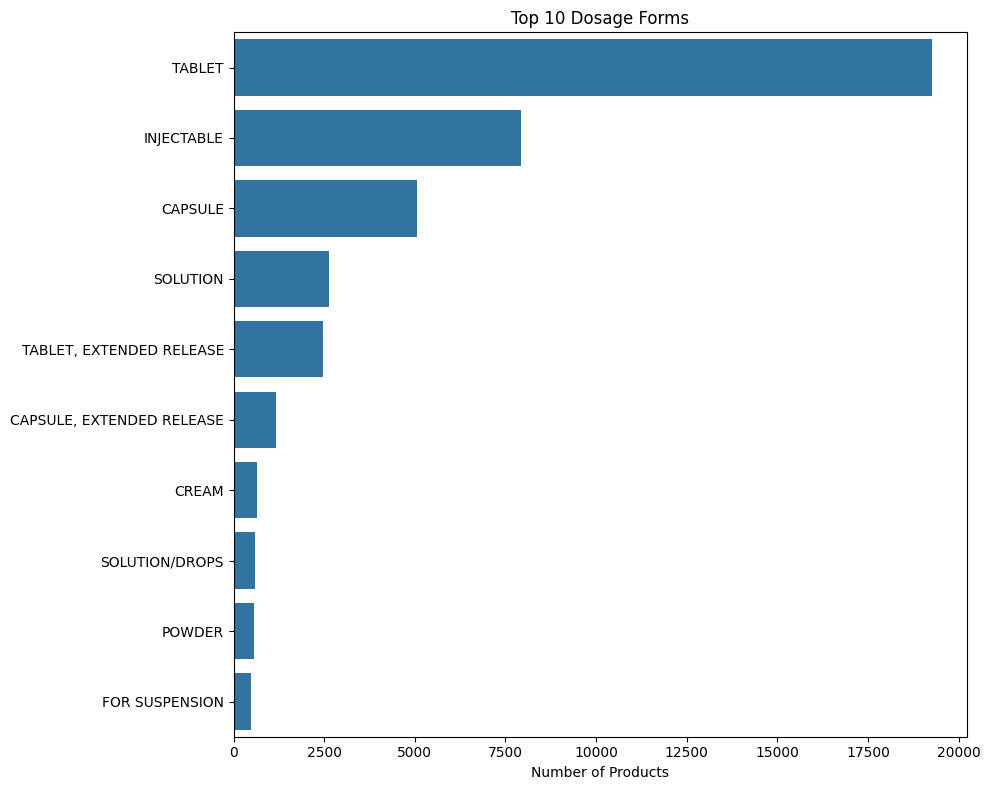

In [6]:
#Univariate analysis of Dosage_Form

# First we need to order the x axis and extract a top 10 to limit the number of categories to be displayed in the countplot.

order = df_prod_tr_cat['Dosage_Form'].value_counts().nlargest(10).index #with value_counts, categories are ordered by count. Then we extract the top 10 and finally we extract the index to obtain a list with the top 10 ordered categories.

plt.figure(figsize=(10,8)) #it is a good practice to first create a figure with the correct size.
sns.countplot(data=df_prod_tr_cat,y='Dosage_Form', order=order) #here we apply the order we have previously defined.
plt.title('Top 10 Dosage Forms')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.tight_layout()
plt.show()

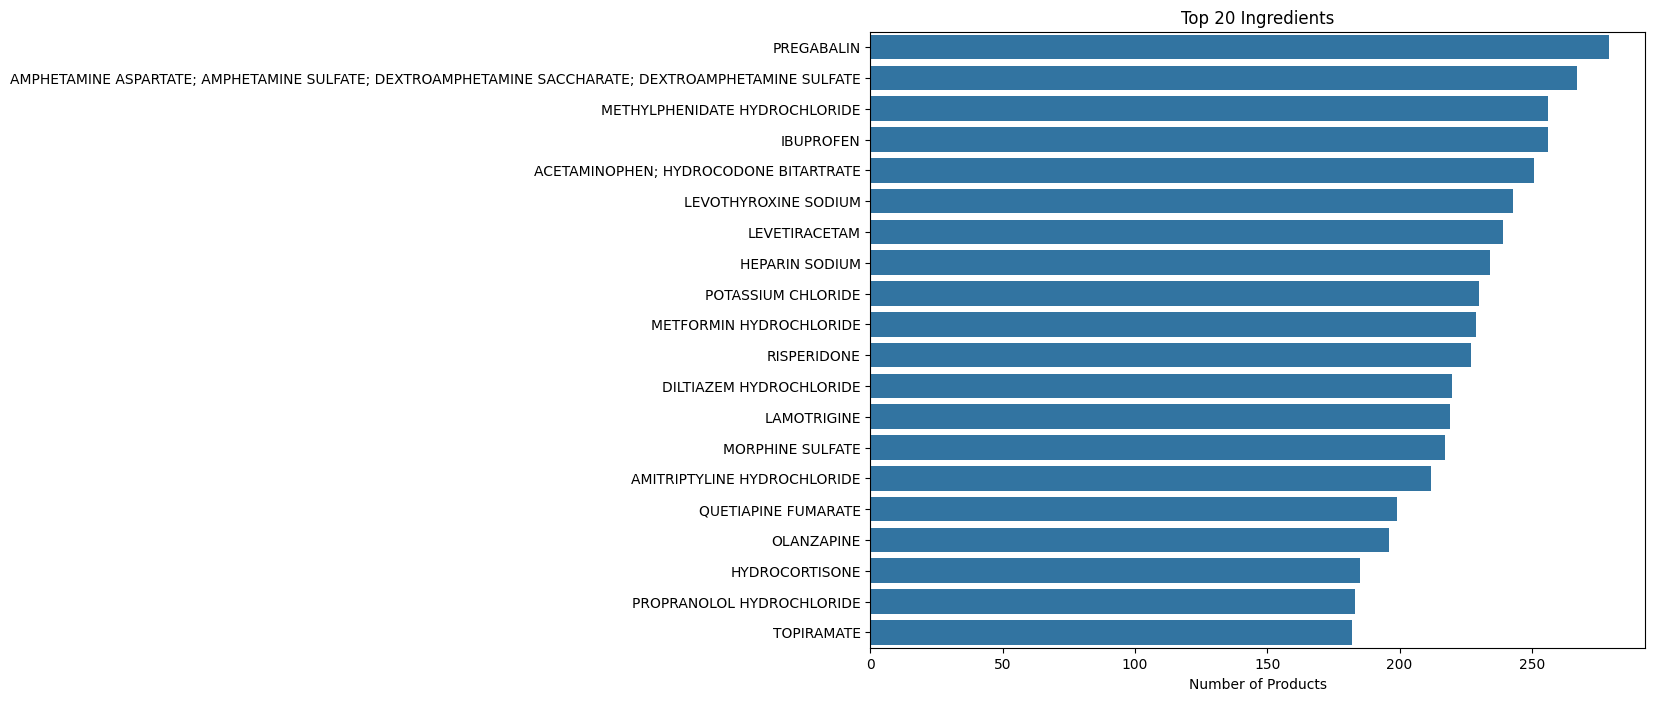

In [7]:
#Univariate analysis of Ingredient

order = df_prod_tr_cat['Ingredient'].value_counts().nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.

plt.figure(figsize=(10,8)) #it is a good practice to first create a figure with the correct size.
sns.countplot(data=df_prod_tr_cat,y='Ingredient', order=order) #here we apply the order we have previously defined.
plt.title('Top 20 Ingredients')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

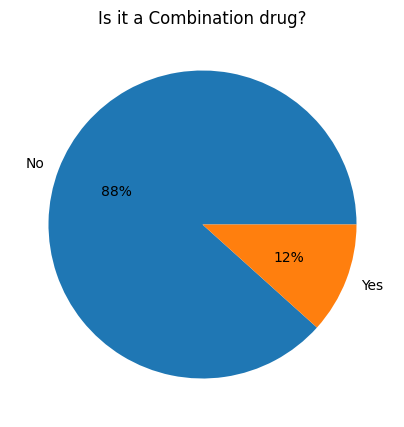

In [8]:
#Univariate analysis for Combination_Drug

data = df_prod_tr_cat['Combination_Drug'].value_counts()  #to build a pie plot in matplotlib we need to extract value counts
labels = df_prod_tr_cat['Combination_Drug'].value_counts().index #and we need also the labels of each category.
plt.figure(figsize=(5,5))
plt.pie(data, labels = labels, autopct='%1.0f%%') #autopct for auto-calculating percentage of each group.
plt.title('Is it a Combination drug?')
plt.show()

In [9]:
#Univariate analysis for Route
df_prod_tr_cat['Route'].value_counts()

Route
ORAL                                            31435
INJECTION                                        7162
TOPICAL                                          1797
INTRAVENOUS                                      1685
OPHTHALMIC                                        786
                                                ...  
INTRA-ARTICULAR                                     1
ENDOCERVICAL                                        1
INTRA-ARTICULAR, INTRAMUSCULAR, INTRAVITREAL        1
INTRACAMERAL                                        1
PERFUSION, BILIARY                                  1
Name: count, Length: 78, dtype: int64

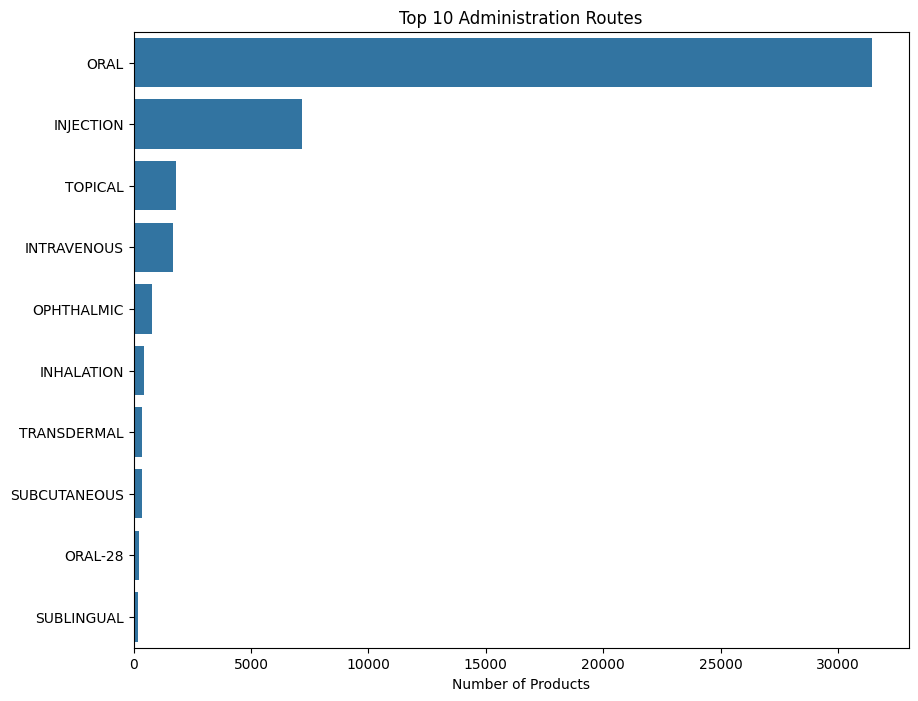

In [10]:
order = df_prod_tr_cat['Route'].value_counts().nlargest(10).index #with value_counts, categories are ordered by count. Then we extract the top 10 and finally we extract the index to obtain a list with the top 10 ordered categories.

plt.figure(figsize=(10,8)) #it is a good practice to first create a figure with the correct size.
sns.countplot(data=df_prod_tr_cat,y='Route', order=order) #here we apply the order we have previously defined.
plt.title('Top 10 Administration Routes')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

In [11]:
#Lets check how many products were tagged with the administration route "ORAL-28".

df_prod_tr_cat['Route'][df_prod_tr_cat['Route']=='ORAL-28'].value_counts()

Route
ORAL-28    232
Name: count, dtype: int64

In [12]:
#We decided to include these products inside the ORAL category. Therefore, we need to perform further transformations:

df_prod_tr['Route'] = df_prod_tr['Route'].str.replace('ORAL-28','ORAL')
df_prod_tr_cat['Route'] = df_prod_tr_cat['Route'].str.replace('ORAL-28','ORAL')

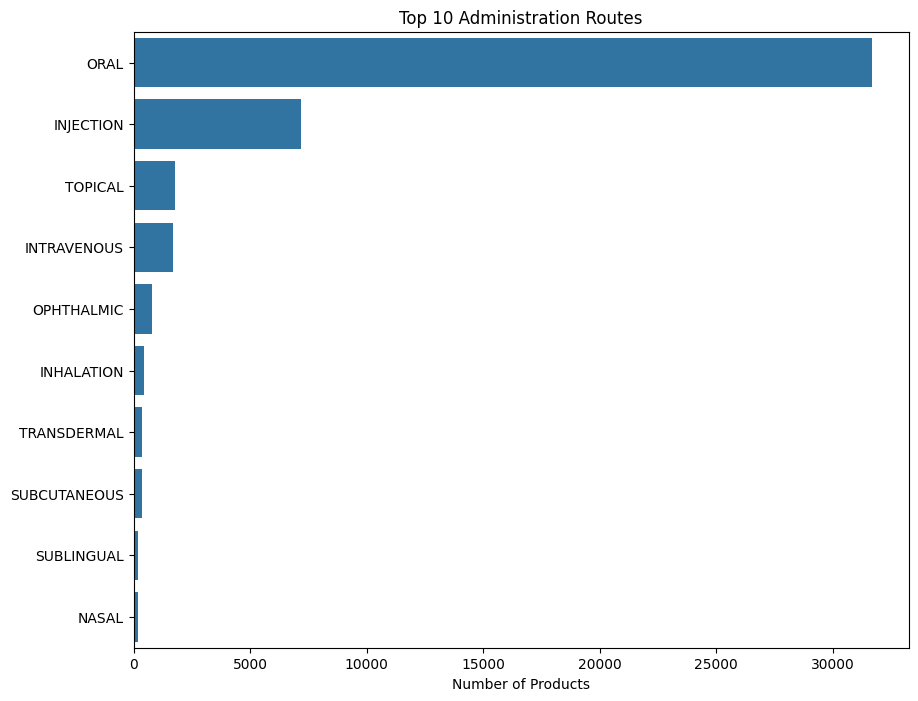

In [13]:
#Let's generate the countplot again...

order = df_prod_tr_cat['Route'].value_counts().nlargest(10).index #with value_counts, categories are ordered by count. Then we extract the top 10 and finally we extract the index to obtain a list with the top 10 ordered categories.

plt.figure(figsize=(10,8)) #it is a good practice to first create a figure with the correct size.
sns.countplot(data=df_prod_tr_cat,y='Route', order=order) #here we apply the order we have previously defined.
plt.title('Top 10 Administration Routes')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

In [14]:
#Univariate analysis for Trade_Name.

df_prod_tr_cat['Trade_Name'].value_counts()

Trade_Name
PREGABALIN                                                                267
DEXTROAMP SACCHARATE, AMP ASPARTATE, DEXTROAMP SULFATE AND AMP SULFATE    244
HYDROCODONE BITARTRATE AND ACETAMINOPHEN                                  221
METFORMIN HYDROCHLORIDE                                                   216
LEVETIRACETAM                                                             200
                                                                         ... 
CHLOROPTIC                                                                  1
COMBIGAN                                                                    1
COSOPT                                                                      1
COSOPT PF                                                                   1
NYSTAFORM                                                                   1
Name: count, Length: 7400, dtype: int64

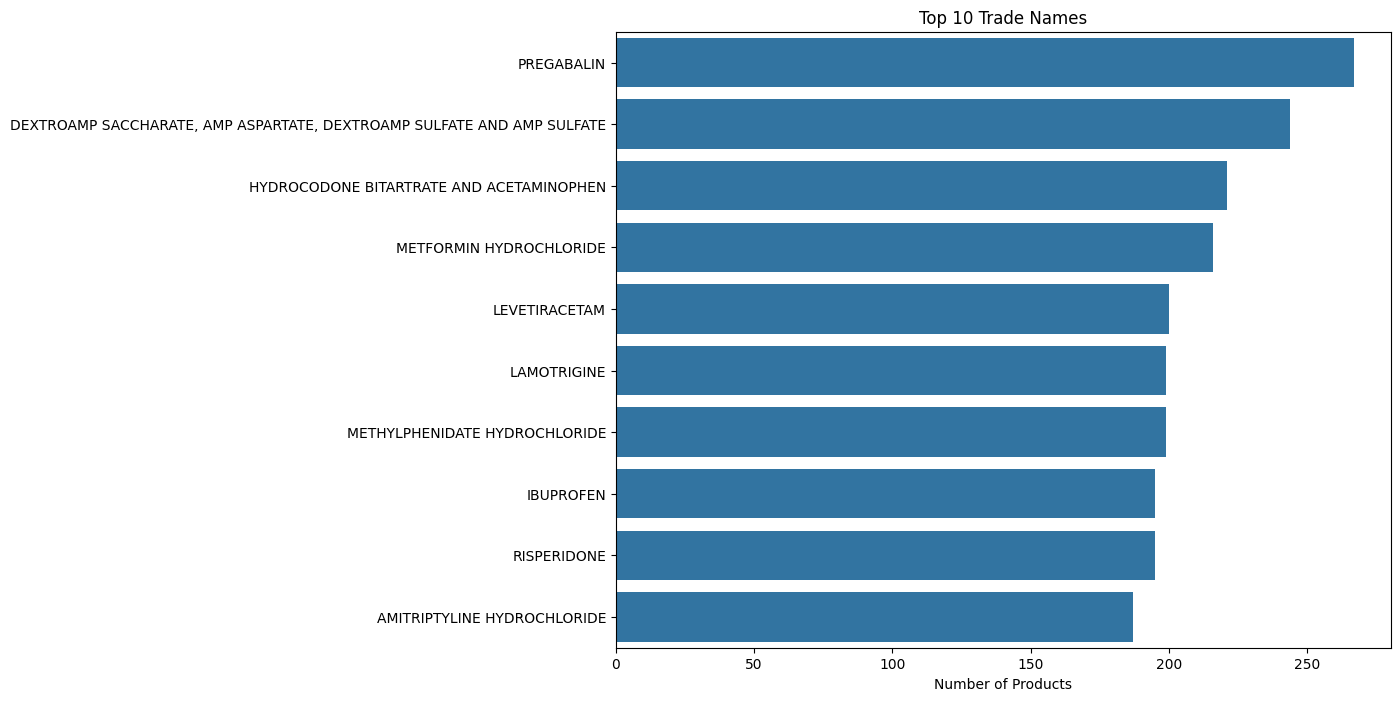

In [15]:
order = df_prod_tr_cat['Trade_Name'].value_counts().nlargest(10).index #with value_counts, categories are ordered by count. Then we extract the top 10 and finally we extract the index to obtain a list with the top 10 ordered categories.

plt.figure(figsize=(10,8)) #it is a good practice to first create a figure with the correct size.
sns.countplot(data=df_prod_tr_cat,y='Trade_Name', order=order) #here we apply the order we have previously defined.
plt.title('Top 10 Trade Names')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

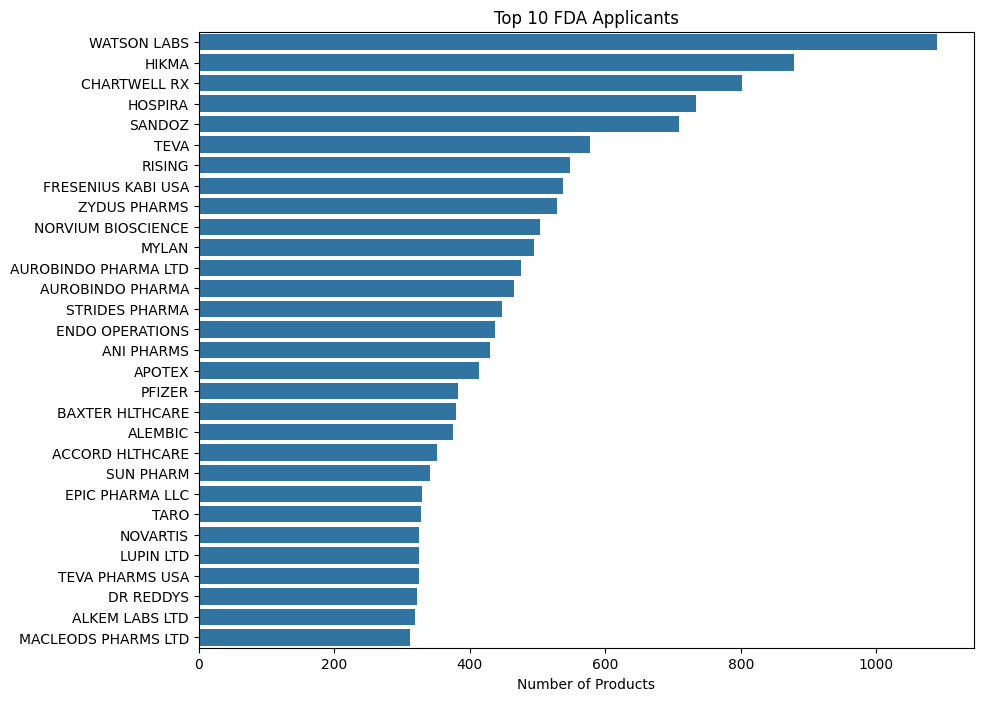

In [16]:
#Univariate analysis for Applicant.

order = df_prod_tr_cat['Applicant'].value_counts().nlargest(30).index #with value_counts, categories are ordered by count. Then we extract the top 10 and finally we extract the index to obtain a list with the top 10 ordered categories.

plt.figure(figsize=(10,8)) #it is a good practice to first create a figure with the correct size.
sns.countplot(data=df_prod_tr_cat,y='Applicant', order=order) #here we apply the order we have previously defined.
plt.title('Top 10 FDA Applicants')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

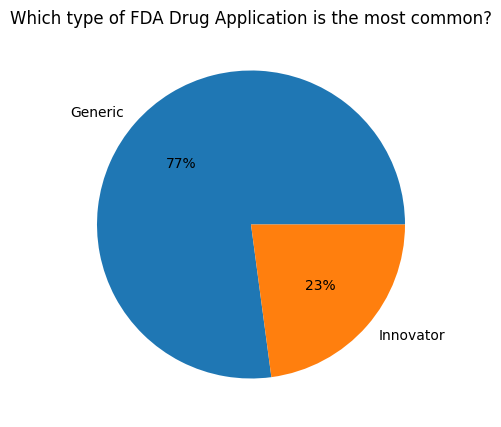

In [17]:
#Univariate analysis for Appl_Type

data = df_prod_tr_cat['Appl_Type'].value_counts()  #to build a pie plot in matplotlib we need to extract value counts
labels = df_prod_tr_cat['Appl_Type'].value_counts().index #and we need also the labels of each category.
plt.figure(figsize=(5,5))
plt.pie(data, labels = labels, autopct='%1.0f%%') #autopct for auto-calculating percentage of each group.
plt.title('Which type of FDA Drug Application is the most common?')
plt.show()

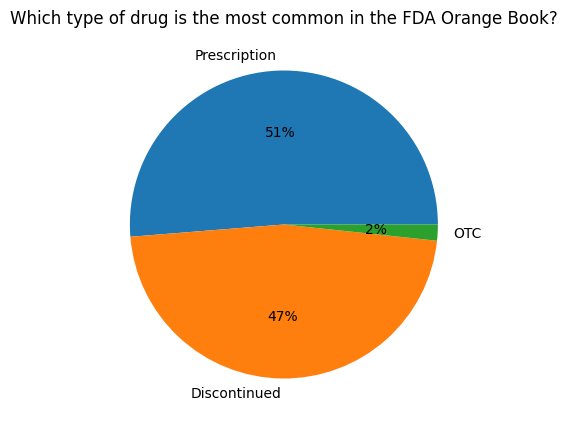

In [18]:
#Univariate analysis for Type

data = df_prod_tr_cat['Type'].value_counts()  #to build a pie plot in matplotlib we need to extract value counts
labels = df_prod_tr_cat['Type'].value_counts().index #and we need also the labels of each category.
plt.figure(figsize=(5,5))
plt.pie(data, labels = labels, autopct='%1.0f%%') #autopct for auto-calculating percentage of each group. We format the percentage with just one decimal.
plt.title('Which type of drug is the most common in the FDA Orange Book?')
plt.show()

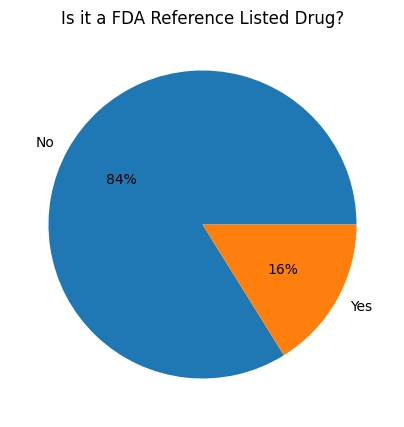

In [19]:
#Univariate analysis for Reference_Listed_Drug

data = df_prod_tr_cat['Reference_Listed_Drug'].value_counts()  #to build a pie plot in matplotlib we need to extract value counts
labels = df_prod_tr_cat['Reference_Listed_Drug'].value_counts().index #and we need also the labels of each category.
plt.figure(figsize=(5,5))
plt.pie(data, labels = labels, autopct='%1.0f%%') #autopct for auto-calculating percentage of each group. We format the percentage with just one decimal.
plt.title('Is it a FDA Reference Listed Drug?')
plt.show()

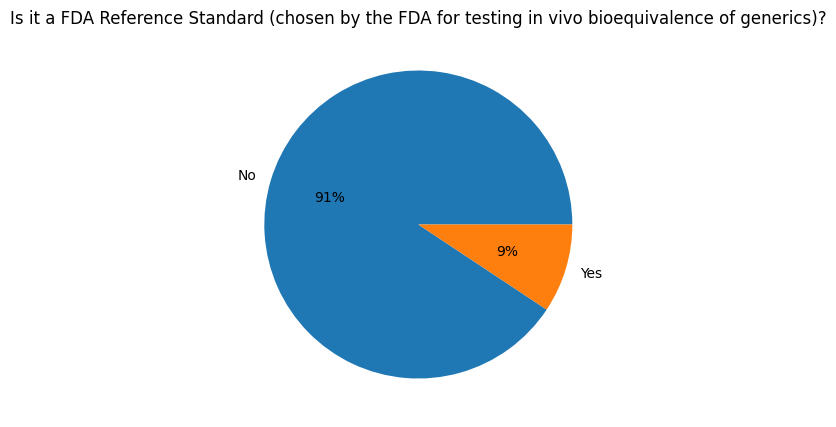

In [20]:
#Univariate analysis for Reference_Standard

data = df_prod_tr_cat['Reference_Standard'].value_counts()  #to build a pie plot in matplotlib we need to extract value counts
labels = df_prod_tr_cat['Reference_Standard'].value_counts().index #and we need also the labels of each category.
plt.figure(figsize=(5,5))
plt.pie(data, labels = labels, autopct='%1.0f%%') #autopct for auto-calculating percentage of each group. We format the percentage with just one decimal.
plt.title('Is it a FDA Reference Standard (chosen by the FDA for testing in vivo bioequivalence of generics)?')
plt.show()

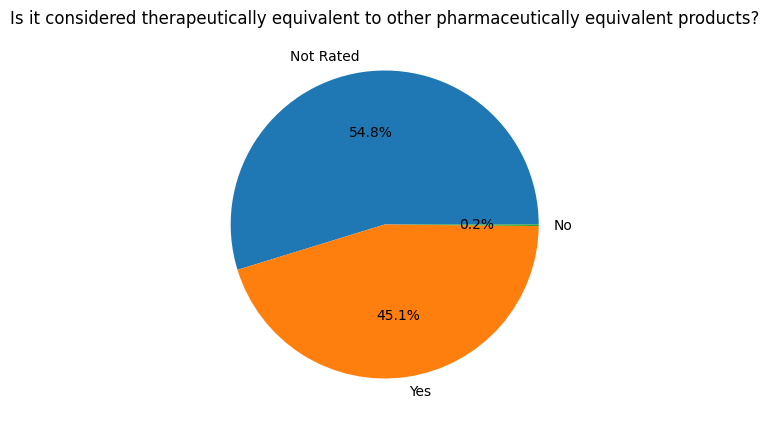

In [21]:
#Univariate analysis for Therapeutically_Equivalent

data = df_prod_tr_cat['Therapeutically_Equivalent'].value_counts()  #to build a pie plot in matplotlib we need to extract value counts
labels = df_prod_tr_cat['Therapeutically_Equivalent'].value_counts().index #and we need also the labels of each category.
plt.figure(figsize=(5,5))
plt.pie(data, labels = labels, autopct='%1.1f%%') #autopct for auto-calculating percentage of each group. We format the percentage with just one decimal.
plt.title('Is it considered therapeutically equivalent to other pharmaceutically equivalent products?')
plt.show()

In [22]:
#I am curious about which FDA-approved drugs were not considered to be therapeutically equivalent to other pharmaceutically equivalent products. Which are those generics that the FDA does not recognize to be therapeutically equivalent to their pharmaceutically equivalent drug?
display(df_prod_tr_cat.loc[(df_prod_tr_cat['Therapeutically_Equivalent']=="No") & (df_prod_tr_cat['Appl_Type']=="Generic"),'Trade_Name'].unique())

array(['EPIFOAM', 'PROCTOFOAM HC', 'TACROLIMUS', 'DIFLORASONE DIACETATE',
       'TERCONAZOLE', 'VITAMIN K1', 'METHYLPHENIDATE HYDROCHLORIDE',
       'PALIPERIDONE', 'ACETAZOLAMIDE', 'ALBUTEROL SULFATE', 'AMABELZ',
       'ANDROID 25', 'ATORVASTATIN CALCIUM', 'BACLOFEN', 'CARBAMAZEPINE',
       'DEXAMETHASONE', 'E.E.S. 400', 'ERYTHROMYCIN ETHYLSUCCINATE',
       'FEBUXOSTAT', 'FENOFIBRATE', 'METHYLTESTOSTERONE', 'PREDNISOLONE',
       'PREDNISONE', 'PROPYLTHIOURACIL', 'RISEDRONATE SODIUM',
       'SILDENAFIL CITRATE', 'TADALAFIL', 'BLISOVI FE 1.5/30'],
      dtype=object)

Lets start answering some of the questions I made myself...

1. Mode/median/mean number of API in the composition of FDA-approved drugs. Is it different between innovators and generics? Is it different between Rx and OTC?

In [23]:
print('Mode/median/mean number of API in the composition of FDA-approved drugs:')
print(f'Mean  = {round(df_prod_tr.loc[df_prod_tr['Type']!="Discontinued",'Number_Of_Ingredients'].mean(),0)}')
print(f'Median  = {round(df_prod_tr.loc[df_prod_tr['Type']!="Discontinued",'Number_Of_Ingredients'].median(),0)}')
print(f'Mode  = {round(df_prod_tr.loc[df_prod_tr['Type']!="Discontinued",'Number_Of_Ingredients'].mode()[0],0)}')
print('\n')
print('Mode/median/mean number of API in the composition of FDA-approved Innovators:')
print(f'Mean  = {round(df_prod_tr.loc[(df_prod_tr['Type']!="Discontinued") & (df_prod_tr['Appl_Type']=="Innovator"),'Number_Of_Ingredients'].mean(),0)}')
print(f'Median  = {round(df_prod_tr.loc[(df_prod_tr['Type']!="Discontinued") & (df_prod_tr['Appl_Type']=="Innovator"),'Number_Of_Ingredients'].median(),0)}')
print(f'Mode  = {round(df_prod_tr.loc[(df_prod_tr['Type']!="Discontinued") & (df_prod_tr['Appl_Type']=="Innovator"),'Number_Of_Ingredients'].mode()[0],0)}')
print('\n')
print('Mode/median/mean number of API in the composition of FDA-approved Generics:')
print(f'Mean  = {round(df_prod_tr.loc[(df_prod_tr['Type']!="Discontinued") & (df_prod_tr['Appl_Type']=="Generic"),'Number_Of_Ingredients'].mean(),0)}')
print(f'Median  = {round(df_prod_tr.loc[(df_prod_tr['Type']!="Discontinued") & (df_prod_tr['Appl_Type']=="Generic"),'Number_Of_Ingredients'].median(),0)}')
print(f'Mode  = {round(df_prod_tr.loc[(df_prod_tr['Type']!="Discontinued") & (df_prod_tr['Appl_Type']=="Generic"),'Number_Of_Ingredients'].mode()[0],0)}')
print('\n')
print('Mode/median/mean number of API in the composition of FDA-approved Rx drugs:')
print(f'Mean  = {round(df_prod_tr.loc[(df_prod_tr['Type']=="Prescription"),'Number_Of_Ingredients'].mean(),0)}')
print(f'Median  = {round(df_prod_tr.loc[(df_prod_tr['Type']=="Prescription"),'Number_Of_Ingredients'].median(),0)}')
print(f'Mode  = {round(df_prod_tr.loc[(df_prod_tr['Type']=="Prescription"),'Number_Of_Ingredients'].mode()[0],0)}')
print('\n')
print('Mode/median/mean number of API in the composition of FDA-approved OTC drugs:')
print(f'Mean  = {round(df_prod_tr.loc[(df_prod_tr['Type']=="OTC"),'Number_Of_Ingredients'].mean(),0)}')
print(f'Median  = {round(df_prod_tr.loc[(df_prod_tr['Type']=="OTC"),'Number_Of_Ingredients'].median(),0)}')
print(f'Mode  = {round(df_prod_tr.loc[(df_prod_tr['Type']=="OTC"),'Number_Of_Ingredients'].mode()[0],0)}')

Mode/median/mean number of API in the composition of FDA-approved drugs:
Mean  = 1.0
Median  = 1.0
Mode  = 1


Mode/median/mean number of API in the composition of FDA-approved Innovators:
Mean  = 1.0
Median  = 1.0
Mode  = 1


Mode/median/mean number of API in the composition of FDA-approved Generics:
Mean  = 1.0
Median  = 1.0
Mode  = 1


Mode/median/mean number of API in the composition of FDA-approved Rx drugs:
Mean  = 1.0
Median  = 1.0
Mode  = 1


Mode/median/mean number of API in the composition of FDA-approved OTC drugs:
Mean  = 1.0
Median  = 1.0
Mode  = 1


2. What percentage represent combination drugs (multiple APIs in their composition) with respect to the total FDA-Approved products? Is it different between innovators and generics? Is it different between Rx and OTC?

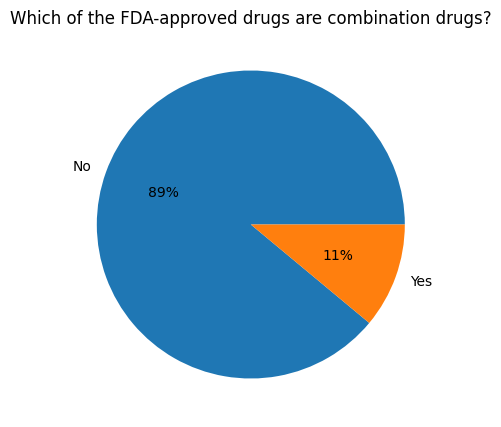

In [24]:
#Univariate analysis for Combination_Drug

data = df_prod_tr_cat.loc[(df_prod_tr_cat['Type']!="Discontinued"),'Combination_Drug'].value_counts()  #to build a pie plot in matplotlib we need to extract value counts
labels = df_prod_tr_cat['Combination_Drug'].value_counts().index #and we need also the labels of each category.
plt.figure(figsize=(5,5))
plt.pie(data, labels = labels, autopct='%1.0f%%') #autopct for auto-calculating percentage of each group.
plt.title('Which of the FDA-approved drugs are combination drugs?')
plt.show()

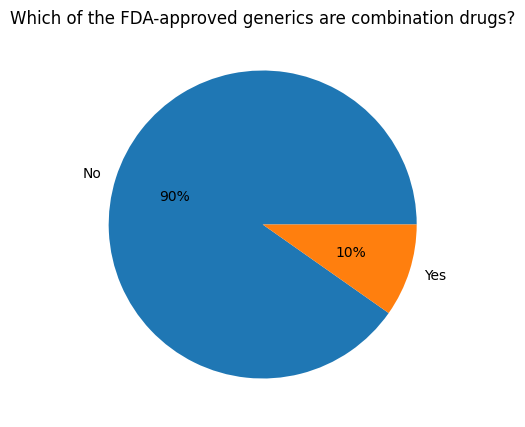

In [25]:
data = df_prod_tr_cat.loc[(df_prod_tr_cat['Appl_Type']=="Generic") & (df_prod_tr_cat['Type']!="Discontinued") ,"Combination_Drug"].value_counts()  #to build a pie plot in matplotlib we need to extract value counts
labels = df_prod_tr_cat['Combination_Drug'].value_counts().index #and we need also the labels of each category.
plt.figure(figsize=(5,5))
plt.pie(data, labels = labels, autopct='%1.0f%%') #autopct for auto-calculating percentage of each group.
plt.title('Which of the FDA-approved generics are combination drugs?')
plt.show()

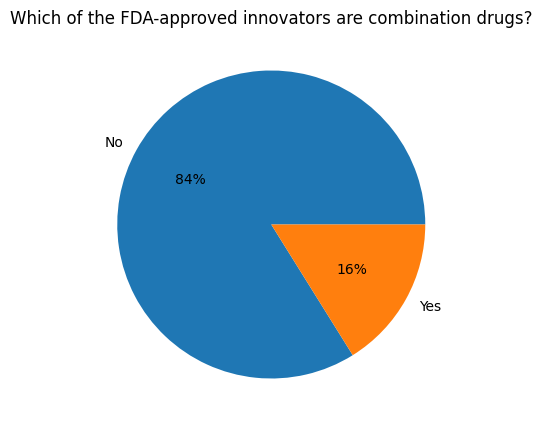

In [26]:
data = df_prod_tr_cat.loc[(df_prod_tr_cat['Appl_Type']=='Innovator') & (df_prod_tr_cat['Type']!="Discontinued") ,'Combination_Drug'].value_counts()  #to build a pie plot in matplotlib we need to extract value counts
labels = df_prod_tr_cat['Combination_Drug'].value_counts().index #and we need also the labels of each category.
plt.figure(figsize=(5,5))
plt.pie(data, labels = labels, autopct='%1.0f%%') #autopct for auto-calculating percentage of each group.
plt.title('Which of the FDA-approved innovators are combination drugs?')
plt.show()

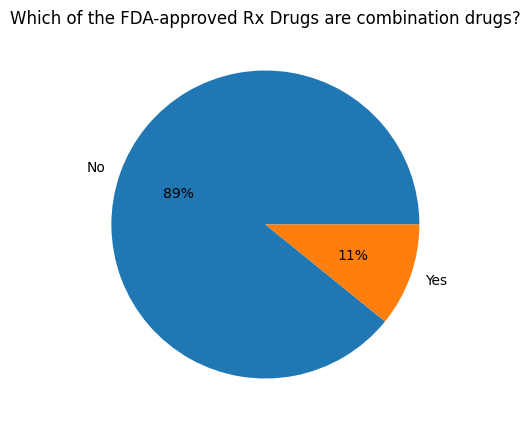

In [27]:
data = df_prod_tr_cat.loc[(df_prod_tr_cat['Type']=='Prescription') & (df_prod_tr_cat['Type']!="Discontinued") ,'Combination_Drug'].value_counts()  #to build a pie plot in matplotlib we need to extract value counts
labels = df_prod_tr_cat['Combination_Drug'].value_counts().index #and we need also the labels of each category.
plt.figure(figsize=(5,5))
plt.pie(data, labels = labels, autopct='%1.0f%%') #autopct for auto-calculating percentage of each group.
plt.title('Which of the FDA-approved Rx Drugs are combination drugs?')
plt.show()

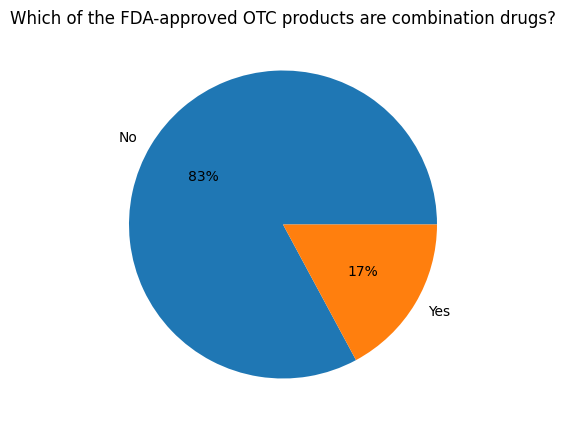

In [28]:
data = df_prod_tr_cat.loc[(df_prod_tr_cat['Type']=='OTC') & (df_prod_tr_cat['Type']!="Discontinued") ,'Combination_Drug'].value_counts()  #to build a pie plot in matplotlib we need to extract value counts
labels = df_prod_tr_cat['Combination_Drug'].value_counts().index #and we need also the labels of each category.
plt.figure(figsize=(5,5))
plt.pie(data, labels = labels, autopct='%1.0f%%') #autopct for auto-calculating percentage of each group.
plt.title('Which of the FDA-approved OTC products are combination drugs?')
plt.show()

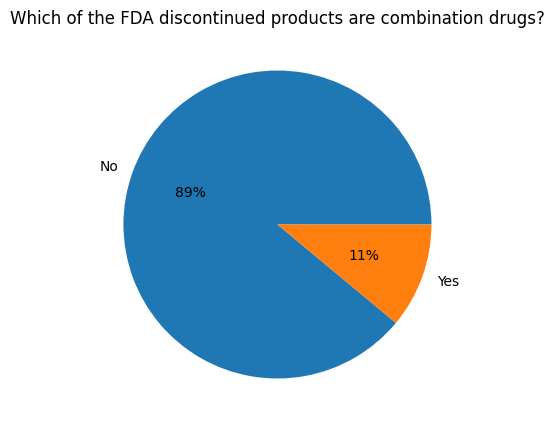

In [29]:
data = df_prod_tr_cat.loc[df_prod_tr_cat['Type']!="Discontinued",'Combination_Drug'].value_counts()  #to build a pie plot in matplotlib we need to extract value counts
labels = df_prod_tr_cat['Combination_Drug'].value_counts().index #and we need also the labels of each category.
plt.figure(figsize=(5,5))
plt.pie(data, labels = labels, autopct='%1.0f%%') #autopct for auto-calculating percentage of each group.
plt.title('Which of the FDA discontinued products are combination drugs?')
plt.show()

3. Which are the most popular APIs in FDA-approved products’ composition? Is it different between innovators and generics? Is it different between Rx and OTC?

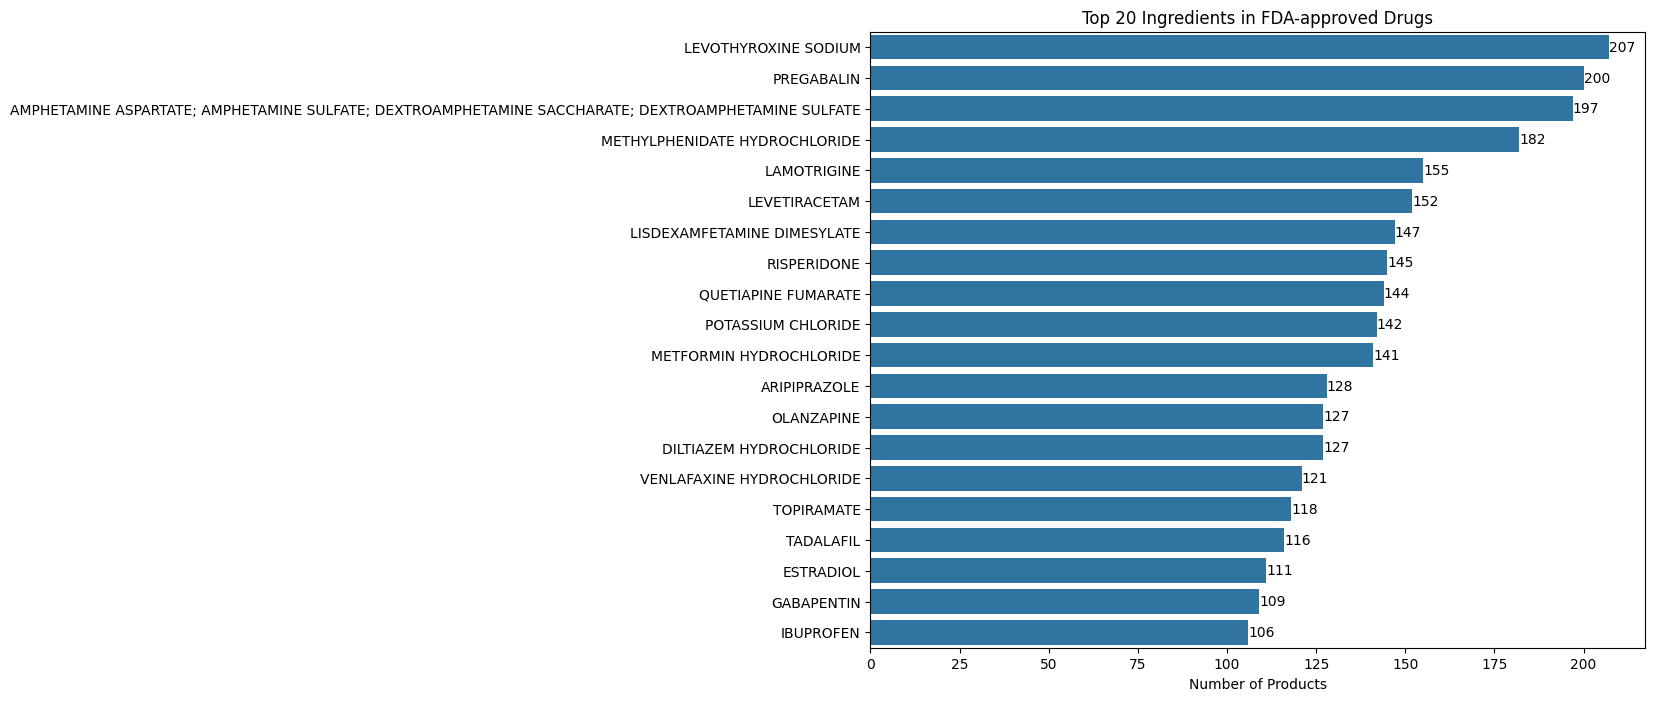

In [30]:
#Univariate analysis of Ingredient

filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Type']!="Discontinued"), 'Ingredient']

order = filtered_data.value_counts().nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.


fig, ax = plt.subplots(figsize=(10,8)) #it is a good practice to first create a figure with the correct size.
sns.countplot(data=pd.DataFrame(filtered_data),y='Ingredient', ax=ax, order=order) #here we apply the order we have previously defined.

df = filtered_data.value_counts().nlargest(20).reset_index()

for container in ax.containers:
  ax.bar_label(container, labels= (f"{c}" for c in df['count']))

plt.title('Top 20 Ingredients in FDA-approved Drugs')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

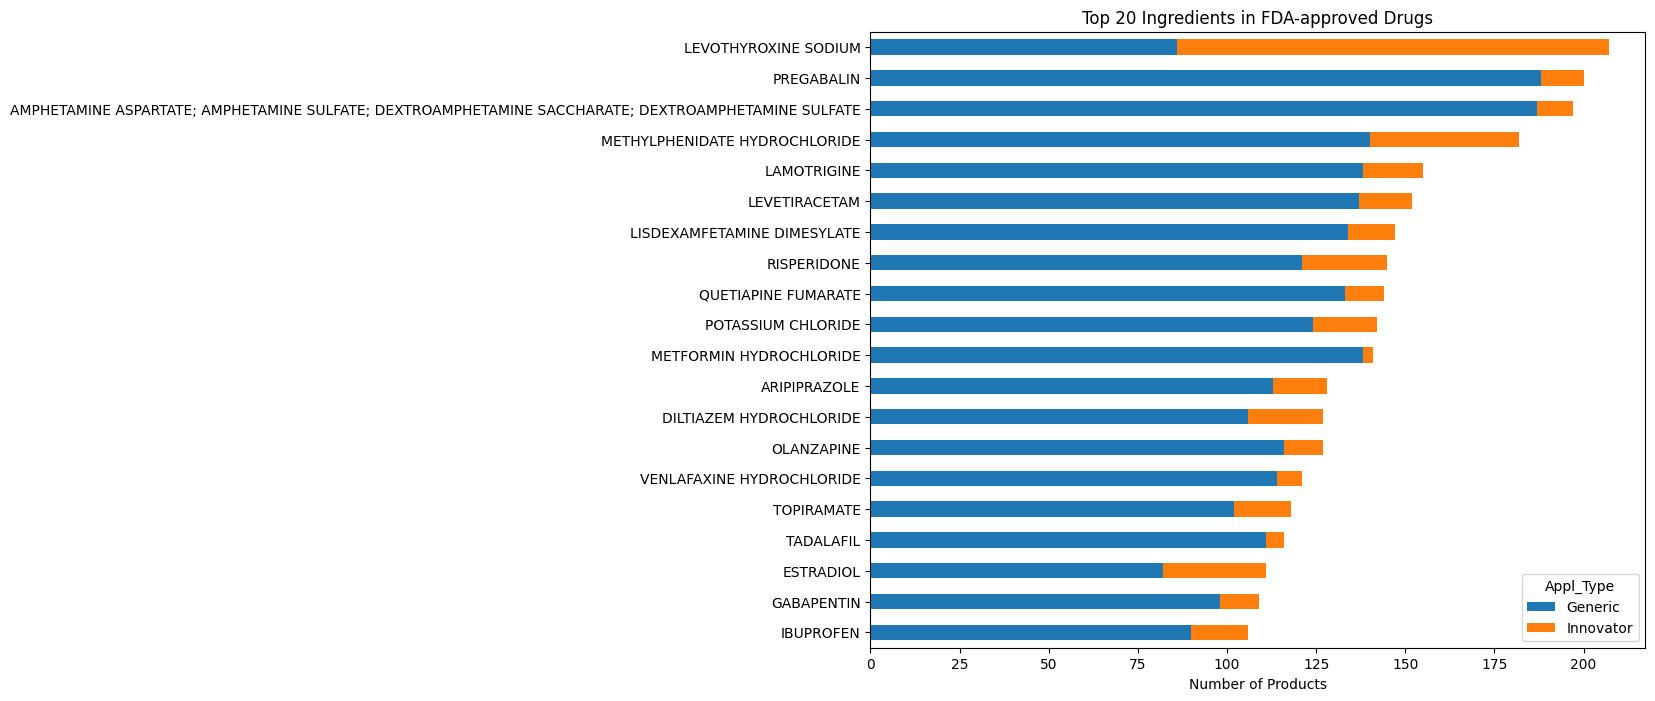

In [31]:
# Filter data
filtered_data = df_prod_tr_cat.loc[df_prod_tr_cat['Type'] != "Discontinued"]

# Compute counts of 'Innovator' and 'Generic' per ingredient
stacked_data = pd.crosstab(filtered_data['Ingredient'], filtered_data['Appl_Type']) #it counts innovators and generics per ingredient.
# display (stacked_data.head())
stacked_data = stacked_data.loc[stacked_data.sum(axis=1).nlargest(20).sort_values(ascending=True).index]

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
stacked_data.plot(kind='barh', stacked=True, ax=ax)

plt.title('Top 20 Ingredients in FDA-approved Drugs')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.legend(title='Appl_Type')
plt.show()

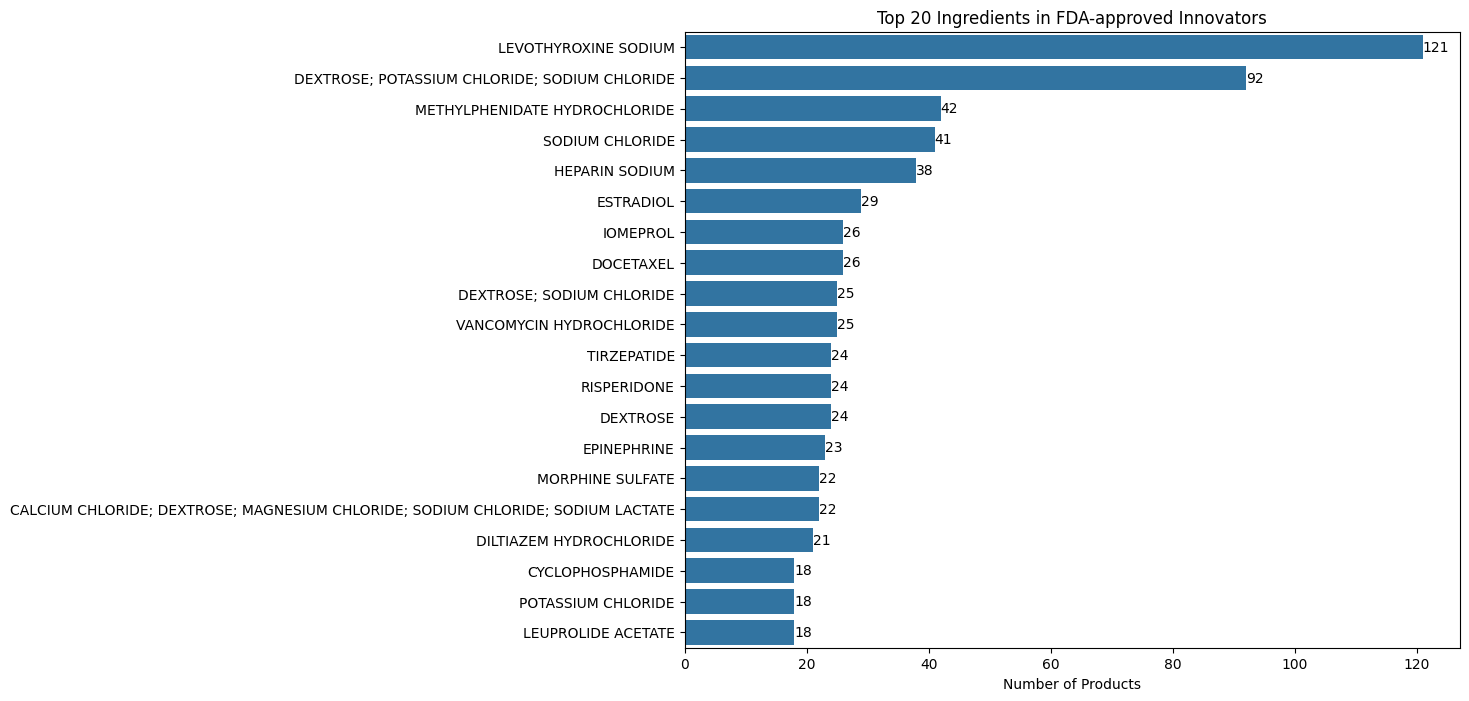

In [32]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Appl_Type']=="Innovator") & (df_prod_tr_cat['Type']!="Discontinued"),'Ingredient'] #we filter dataframe to obtain just the ingredients of FDA-approved innovators.
order = filtered_data.value_counts().nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.

fig, ax = plt.subplots(figsize=(10,8)) #it is a good practice to first create a figure with the correct size.
sns.countplot(data=pd.DataFrame(filtered_data),y='Ingredient', ax=ax, order=order) #here we apply the order we have previously defined.

df = filtered_data.value_counts().nlargest(20).reset_index()

for container in ax.containers:
  ax.bar_label(container, labels= (f"{c}" for c in df['count']))

plt.title('Top 20 Ingredients in FDA-approved Innovators')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

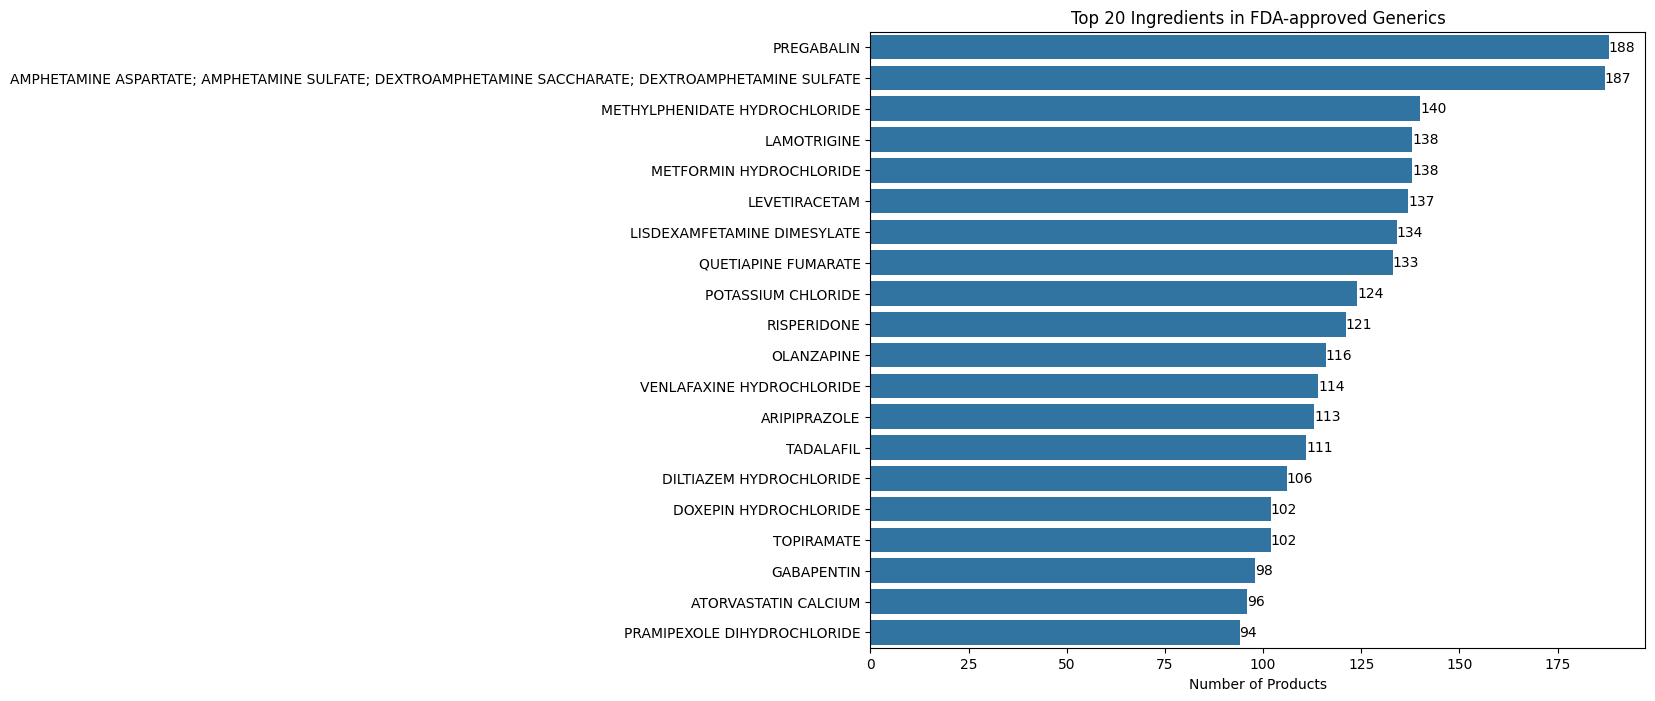

In [33]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Appl_Type']=="Generic") & (df_prod_tr_cat['Type']!="Discontinued"),'Ingredient'] #we filter dataframe to obtain just the ingredients of FDA-approved generics.
order = filtered_data.value_counts().nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.

fig, ax = plt.subplots(figsize=(10,8)) #it is a good practice to first create a figure with the correct size.
sns.countplot(data=pd.DataFrame(filtered_data),y='Ingredient', ax=ax, order=order) #here we apply the order we have previously defined.

df = filtered_data.value_counts().nlargest(20).reset_index()

for container in ax.containers:
  ax.bar_label(container, labels= (f"{c}" for c in df['count']))
  
plt.title('Top 20 Ingredients in FDA-approved Generics')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

,Ingredient,count
0,LEVOTHYROXINE SODIUM,207
1,PREGABALIN,200
2,AMPHETAMINE ASPARTATE; AMPHETAMINE SULFATE; DE...,197
3,METHYLPHENIDATE HYDROCHLORIDE,182
4,LAMOTRIGINE,155


,Ingredient,count
19,DOXEPIN HYDROCHLORIDE,105
18,GABAPENTIN,109
17,ESTRADIOL,111
16,TADALAFIL,116
15,TOPIRAMATE,118


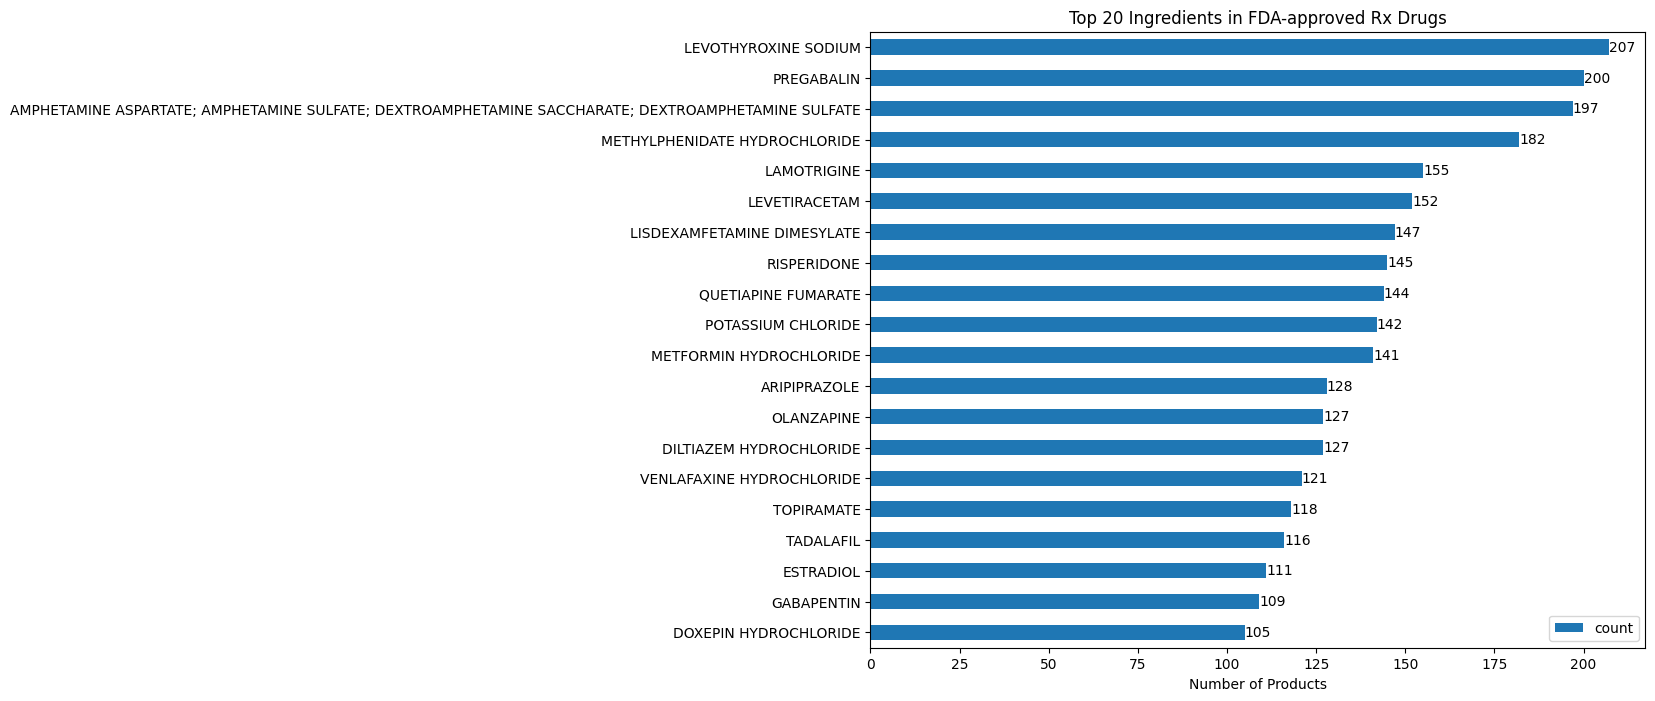

In [56]:
filtered_data = df_prod_tr_cat.loc[df_prod_tr_cat['Type']=="Prescription",'Ingredient'].value_counts().reset_index() #we filter dataframe to obtain just the ingredients of FDA-approved Rx.

display(filtered_data.head())

order = filtered_data['count'].nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.

fig, ax = plt.subplots(figsize=(10,8)) #it is a good practice to first create a figure with the correct size.
filtered_data = filtered_data.loc[order].sort_values(by='count')

display(filtered_data.head())

filtered_data.plot(kind="barh", x='Ingredient', ax=ax) #here we apply the order we have previously defined.

for container in ax.containers:
  ax.bar_label(container, labels= (f"{c}" for c in filtered_data['count']))

plt.title('Top 20 Ingredients in FDA-approved Rx Drugs')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

,Ingredient,count
0,CETIRIZINE HYDROCHLORIDE,93
1,NICOTINE POLACRILEX,70
2,IBUPROFEN,62
3,FEXOFENADINE HYDROCHLORIDE,47
4,LORATADINE,39


,Ingredient,count
19,GUAIFENESIN; PSEUDOEPHEDRINE HYDROCHLORIDE,12
17,CHLORHEXIDINE GLUCONATE,12
18,LOPERAMIDE HYDROCHLORIDE,12
16,ACETAMINOPHEN,13
15,LEVONORGESTREL,13


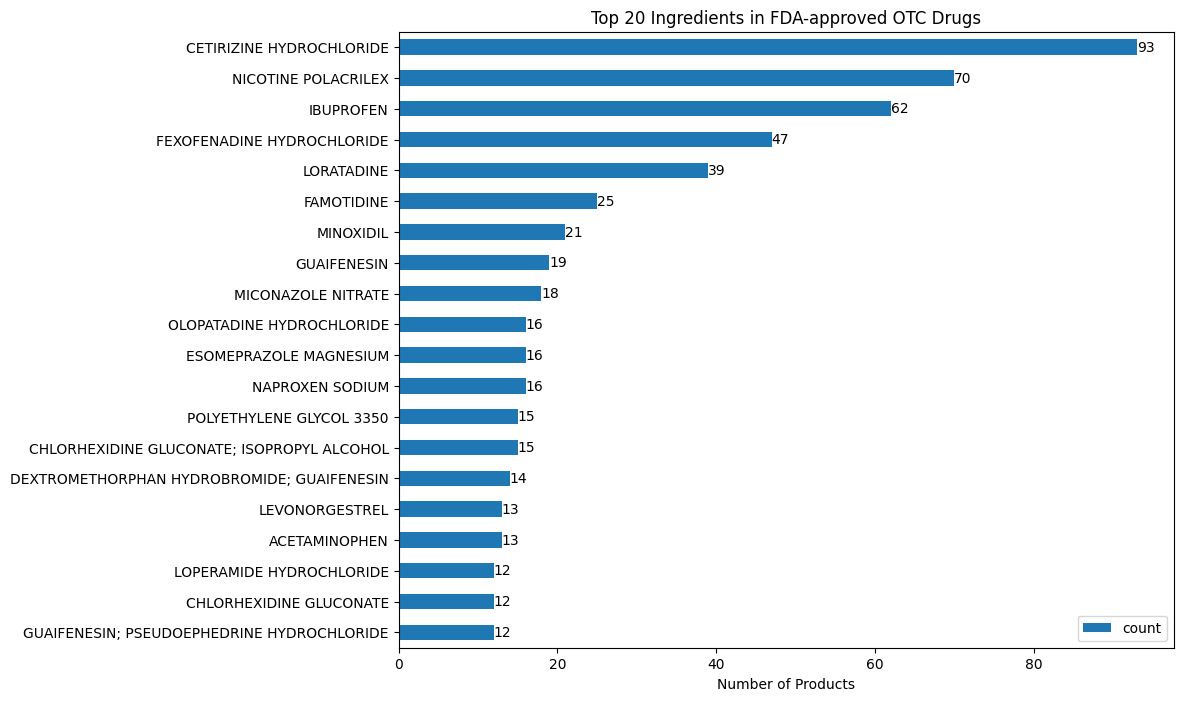

In [57]:
filtered_data = df_prod_tr_cat.loc[df_prod_tr_cat['Type']=="OTC",'Ingredient'].value_counts().reset_index() #we filter dataframe to obtain just the ingredients of FDA-approved Rx.

display(filtered_data.head())

order = filtered_data['count'].nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.

fig, ax = plt.subplots(figsize=(10,8)) #it is a good practice to first create a figure with the correct size.
filtered_data = filtered_data.loc[order].sort_values(by='count')

display(filtered_data.head())

filtered_data.plot(kind="barh", x='Ingredient', ax=ax) #here we apply the order we have previously defined.

for container in ax.containers:
  ax.bar_label(container, labels= (f"{c}" for c in filtered_data['count']))

plt.title('Top 20 Ingredients in FDA-approved OTC Drugs')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

4. Which are the most common dosage forms and administration routes in FDA-approved drugs? Is it different between innovators and generics? Is it different between Rx and OTC?

In [ ]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Appl_Type']=="Innovator") & (df_prod_tr_cat['Type']!="Discontinued"),'Dosage_Form'] #we filter the dataframe to obtain just the dosage forms of FDA-approved innovators.

pd.DataFrame(filtered_data).head()

,Dosage_Form
1,"AEROSOL, FOAM"
2,"AEROSOL, FOAM"
21,"AEROSOL, FOAM"
22,"AEROSOL, FOAM"
25,"AEROSOL, FOAM"


,Dosage_Form,count,Percentage
0,TABLET,9913,40.7
1,INJECTABLE,3539,14.5
2,CAPSULE,2706,11.1
3,SOLUTION,1711,7.0
4,"TABLET, EXTENDED RELEASE",1509,6.2
5,"CAPSULE, EXTENDED RELEASE",705,2.9
6,POWDER,396,1.6
7,CREAM,327,1.3
8,SOLUTION/DROPS,322,1.3
9,FOR SUSPENSION,243,1.0


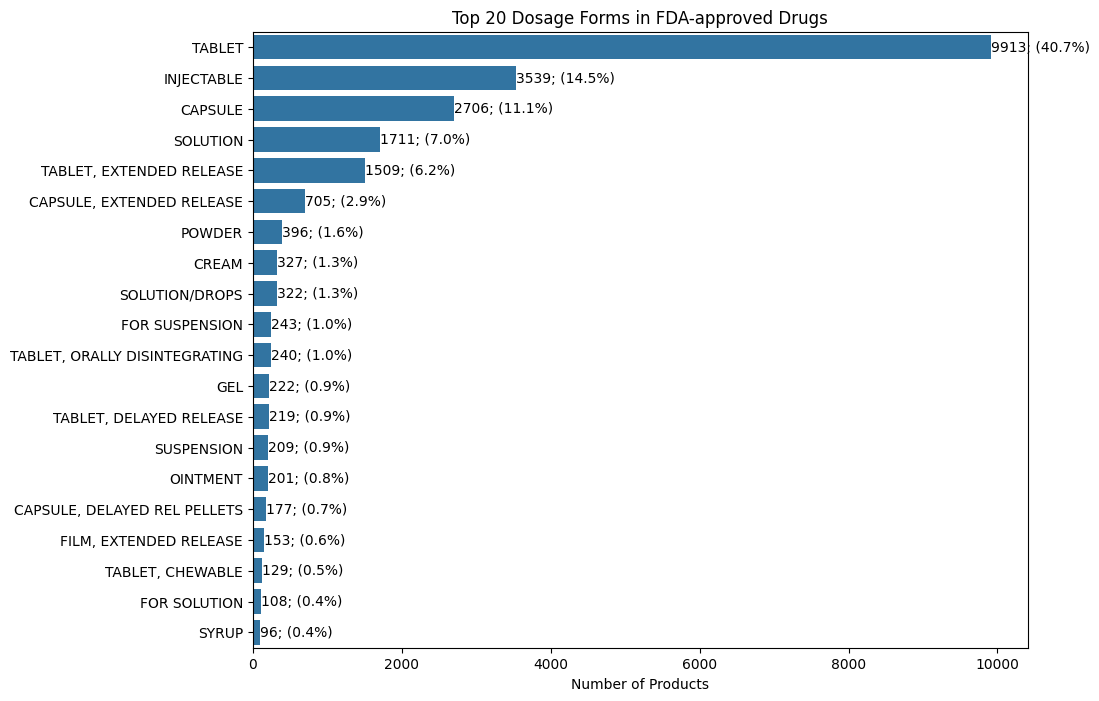

In [67]:
filtered_data = df_prod_tr_cat.loc[df_prod_tr_cat['Type']!="Discontinued",'Dosage_Form'] #we filter the dataframe to obtain just the dosage forms of FDA-approved drugs.

order = filtered_data.value_counts().nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.

fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=pd.DataFrame(filtered_data),y='Dosage_Form', ax=ax, order=order)

df = filtered_data.value_counts().reset_index()  #we create a df to calculate percentages.
df['Percentage']=round((df['count']/df['count'].sum())*100,1) #percentage calculation for each count.

df = df.nlargest(20, columns='count')

display(df)

for container in ax.containers:
  ax.bar_label(container, labels= [f"{c}; ({p}%)" for c, p in zip(df['count'], df['Percentage'])] ) #now we use count and percentages as bar labels. The zip formula is very useful to implement two different itterations in just one for loop.

plt.title('Top 20 Dosage Forms in FDA-approved Drugs')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

,Dosage_Form,count,Percentage
0,TABLET,1309,26.6
1,INJECTABLE,821,16.7
2,SOLUTION,718,14.6
3,CAPSULE,448,9.1
4,"TABLET, EXTENDED RELEASE",210,4.3
5,POWDER,186,3.8
6,"CAPSULE, EXTENDED RELEASE",144,2.9
7,CREAM,77,1.6
8,SOLUTION/DROPS,73,1.5
9,SUSPENSION,72,1.5


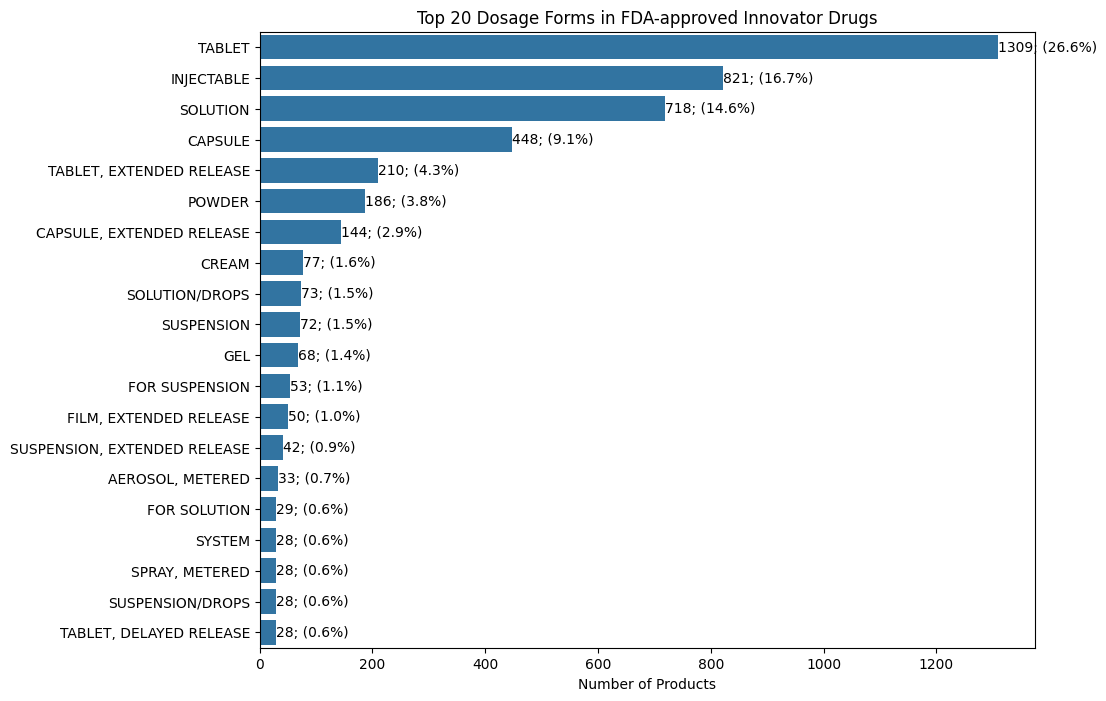

In [68]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Appl_Type']=="Innovator") & (df_prod_tr_cat['Type']!="Discontinued"),'Dosage_Form'] #we filter dataframe to obtain just the dosage forms of FDA-approved innovators.

order = filtered_data.value_counts().nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.

fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=pd.DataFrame(filtered_data),y='Dosage_Form', ax=ax, order=order)

df = filtered_data.value_counts().reset_index()  #we create a df to calculate percentages.
df['Percentage']=round((df['count']/df['count'].sum())*100,1) #percentage calculation for each count.

df = df.nlargest(20, columns='count')

display(df)

for container in ax.containers:
  ax.bar_label(container, labels= [f"{c}; ({p}%)" for c, p in zip(df['count'], df['Percentage'])] ) #now we use percentages as bar labels.

plt.title('Top 20 Dosage Forms in FDA-approved Innovator Drugs')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

,Dosage_Form,count,Percentage
0,TABLET,8604,44.2
1,INJECTABLE,2718,14.0
2,CAPSULE,2258,11.6
3,"TABLET, EXTENDED RELEASE",1299,6.7
4,SOLUTION,993,5.1
5,"CAPSULE, EXTENDED RELEASE",561,2.9
6,CREAM,250,1.3
7,SOLUTION/DROPS,249,1.3
8,"TABLET, ORALLY DISINTEGRATING",215,1.1
9,POWDER,210,1.1


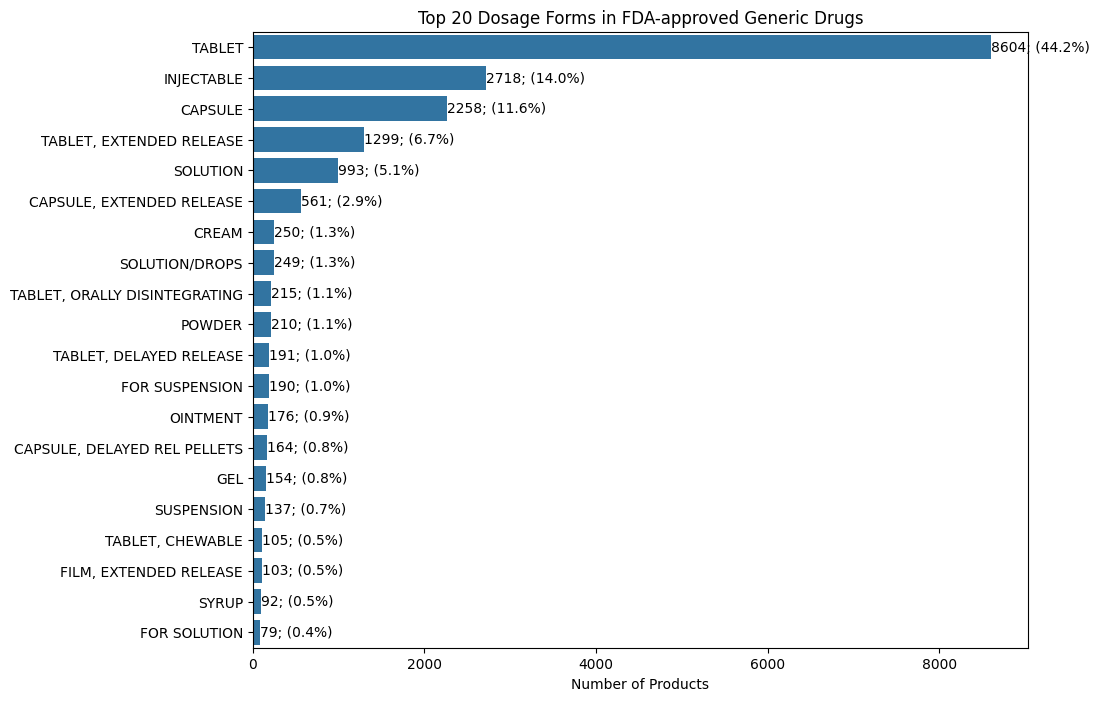

In [69]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Appl_Type']=="Generic") & (df_prod_tr_cat['Type']!="Discontinued"),'Dosage_Form'] #we filter dataframe to obtain just the dosage forms of FDA-approved generics.

order = filtered_data.value_counts().nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.

fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=pd.DataFrame(filtered_data),y='Dosage_Form', ax=ax, order=order)

df = filtered_data.value_counts().reset_index()  #we create a df to calculate percentages.
df['Percentage']=round((df['count']/df['count'].sum())*100,1) #percentage calculation for each count.

df = df.nlargest(20, columns='count')

display(df)

for container in ax.containers:
  ax.bar_label(container, labels= [f"{c}; ({p}%)" for c, p in zip(df['count'], df['Percentage'])] ) #now we use percentages as bar labels.

plt.title('Top 20 Dosage Forms in FDA-approved Generic Drugs')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

,Dosage_Form,count,Percentage
0,TABLET,9667,40.9
1,INJECTABLE,3539,15.0
2,CAPSULE,2661,11.3
3,SOLUTION,1661,7.0
4,"TABLET, EXTENDED RELEASE",1428,6.0
5,"CAPSULE, EXTENDED RELEASE",705,3.0
6,POWDER,396,1.7
7,CREAM,299,1.3
8,SOLUTION/DROPS,288,1.2
9,FOR SUSPENSION,241,1.0


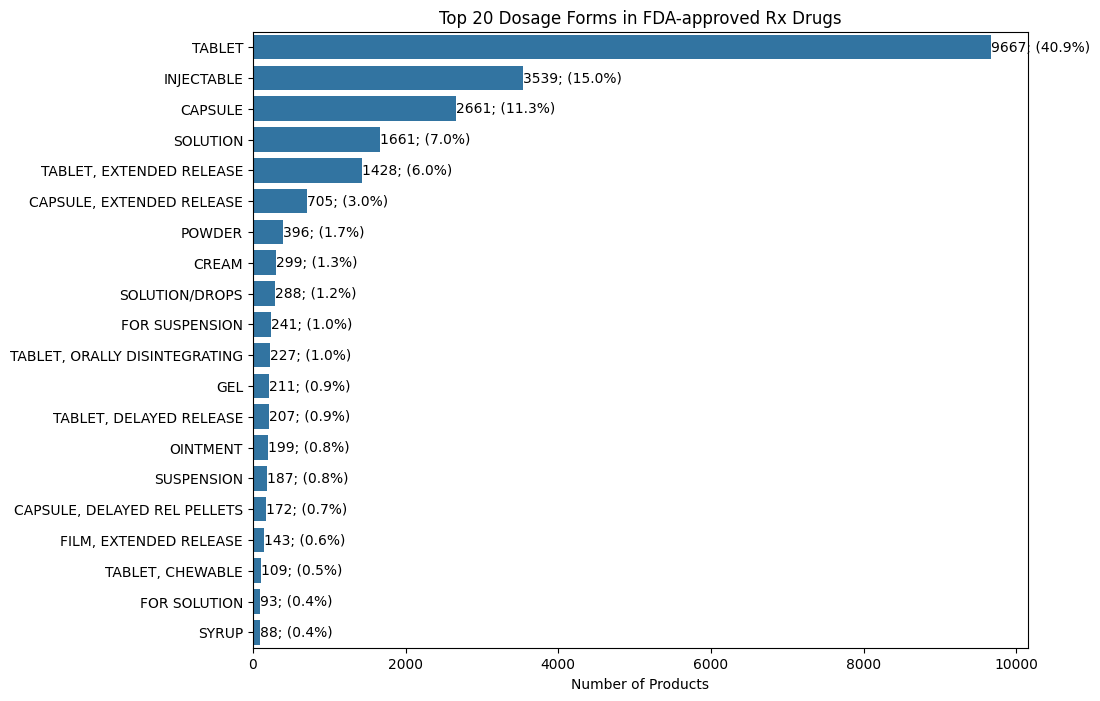

In [70]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Type']=="Prescription") & (df_prod_tr_cat['Type']!="Discontinued"),'Dosage_Form'] #we filter dataframe to obtain just the dosage forms of FDA-approved Rx drugs.

order = filtered_data.value_counts().nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.

fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=pd.DataFrame(filtered_data),y='Dosage_Form', ax=ax, order=order)

df = filtered_data.value_counts().reset_index()  #we create a df to calculate percentages.
df['Percentage']=round((df['count']/df['count'].sum())*100,1) #percentage calculation for each count.

df = df.nlargest(20, columns='count')

display(df)

for container in ax.containers:
  ax.bar_label(container, labels= [f"{c}; ({p}%)" for c, p in zip(df['count'], df['Percentage'])] ) #now we use percentages as bar labels.

plt.title('Top 20 Dosage Forms in FDA-approved Rx Drugs')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

,Dosage_Form,count,Percentage
0,TABLET,246,31.7
1,"TABLET, EXTENDED RELEASE",81,10.4
2,SOLUTION,50,6.4
3,CAPSULE,45,5.8
4,TROCHE/LOZENGE,40,5.2
5,SOLUTION/DROPS,34,4.4
6,"GUM, CHEWING",30,3.9
7,CREAM,28,3.6
8,"SPRAY, METERED",23,3.0
9,SUSPENSION,22,2.8


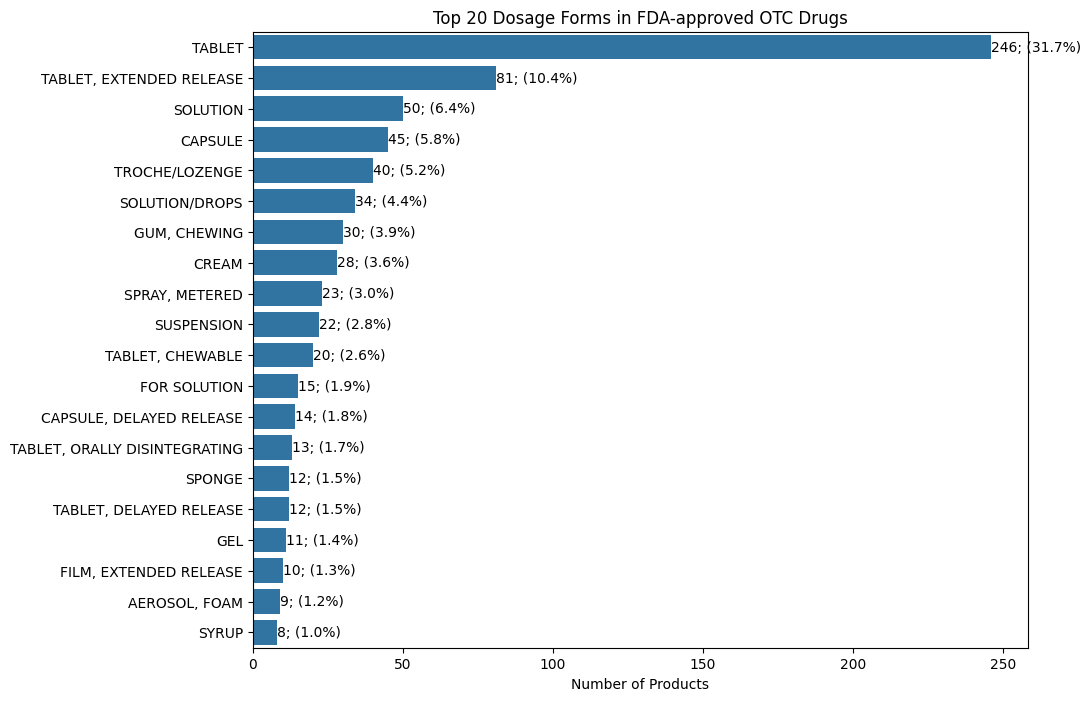

In [71]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Type']=="OTC") & (df_prod_tr_cat['Type']!="Discontinued"),'Dosage_Form'] #we filter dataframe to obtain just the dosage forms of FDA-approved OTC drugs.

order = filtered_data.value_counts().nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.

fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=pd.DataFrame(filtered_data),y='Dosage_Form', ax=ax, order=order)

df = filtered_data.value_counts().reset_index()  #we create a df to calculate percentages.
df['Percentage']=round((df['count']/df['count'].sum())*100,1) #percentage calculation for each count.

df = df.nlargest(20, columns='count')

display(df)

for container in ax.containers:
  ax.bar_label(container, labels= [f"{c}; ({p}%)" for c, p in zip(df['count'], df['Percentage'])] ) #now we use percentages as bar labels.

plt.title('Top 20 Dosage Forms in FDA-approved OTC Drugs')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

,Route,count,Percentage
0,ORAL,16940,69.5
1,INJECTION,3033,12.5
2,INTRAVENOUS,1285,5.3
3,TOPICAL,977,4.0
4,OPHTHALMIC,420,1.7
5,SUBCUTANEOUS,292,1.2
6,TRANSDERMAL,277,1.1
7,INHALATION,228,0.9
8,NASAL,113,0.5
9,INTRAMUSCULAR,99,0.4


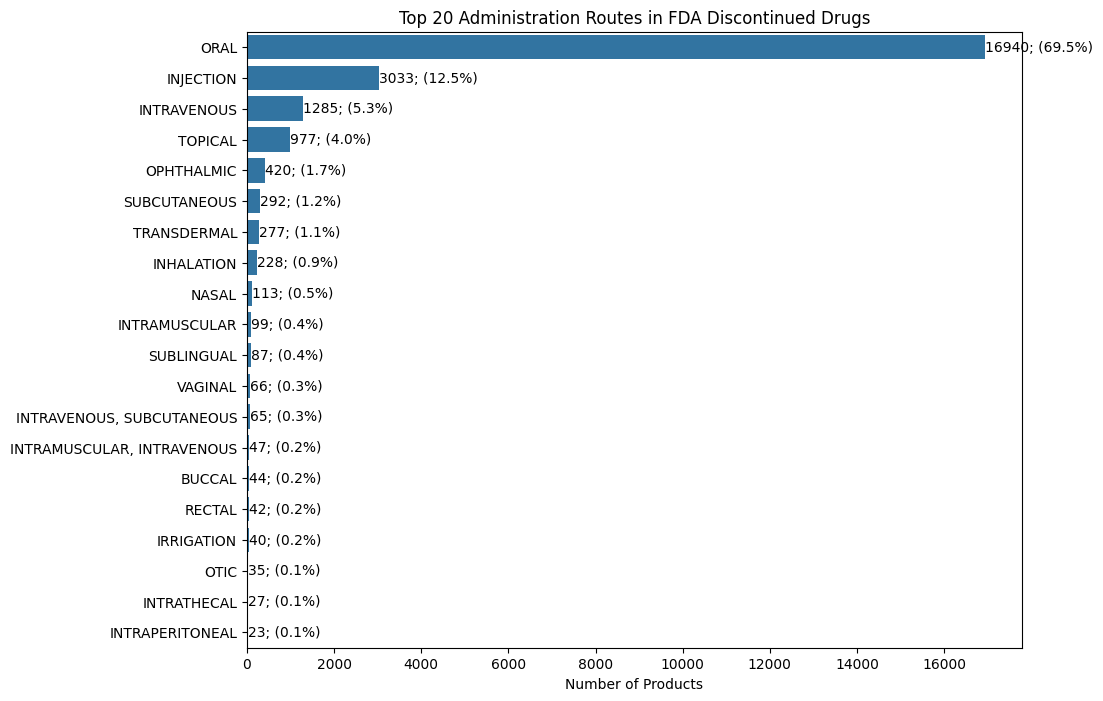

In [72]:
filtered_data = df_prod_tr_cat.loc[df_prod_tr_cat['Type']!="Discontinued",'Route'] #we filter the dataframe to obtain just the routes of FDA-approved drugs.

order = filtered_data.value_counts().nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.

fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=pd.DataFrame(filtered_data),y='Route', ax=ax, order=order)

df = filtered_data.value_counts().reset_index()  #we create a df to calculate percentages.
df['Percentage']=round((df['count']/df['count'].sum())*100,1) #percentage calculation for each count.

df = df.nlargest(20, columns='count')

display(df)

for container in ax.containers:
  ax.bar_label(container, labels= [f"{c}; ({p}%)" for c, p in zip(df['count'], df['Percentage'])] ) #now we use count and percentages as bar labels. The zip formula is very useful to implement two different itterations in just one for loop.

plt.title('Top 20 Administration Routes in FDA Discontinued Drugs')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

,Route,count,Percentage
0,ORAL,16381,69.5
1,INJECTION,3033,12.9
2,INTRAVENOUS,1285,5.4
3,TOPICAL,887,3.8
4,OPHTHALMIC,385,1.6
5,SUBCUTANEOUS,292,1.2
6,TRANSDERMAL,267,1.1
7,INHALATION,227,1.0
8,INTRAMUSCULAR,99,0.4
9,NASAL,90,0.4


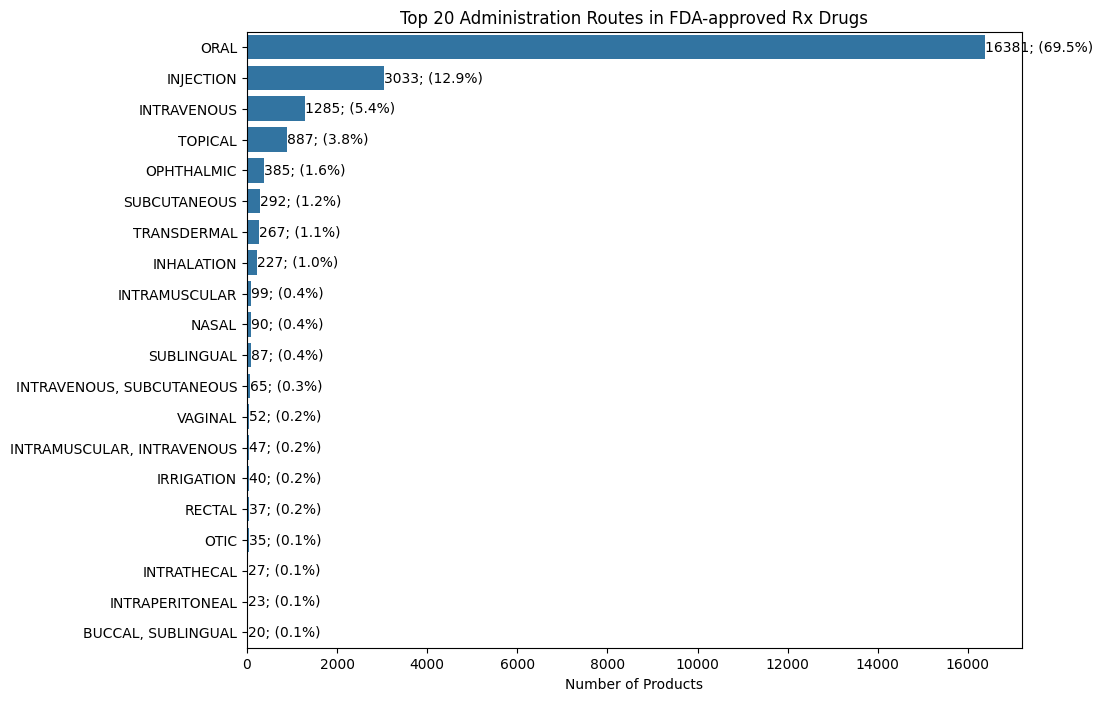

In [73]:
filtered_data = df_prod_tr_cat.loc[df_prod_tr_cat['Type']=="Prescription",'Route'] #we filter the dataframe to obtain just the routes of FDA-approved Rx drugs.

order = filtered_data.value_counts().nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.

fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=pd.DataFrame(filtered_data),y='Route', ax=ax, order=order)

df = filtered_data.value_counts().reset_index()  #we create a df to calculate percentages.
df['Percentage']=round((df['count']/df['count'].sum())*100,1) #percentage calculation for each count.

df = df.nlargest(20, columns='count')

display(df)

for container in ax.containers:
  ax.bar_label(container, labels= [f"{c}; ({p}%)" for c, p in zip(df['count'], df['Percentage'])] ) #now we use count and percentages as bar labels. The zip formula is very useful to implement two different itterations in just one for loop.

plt.title('Top 20 Administration Routes in FDA-approved Rx Drugs')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

,Route,count,Percentage
0,ORAL,559,72.0
1,TOPICAL,90,11.6
2,OPHTHALMIC,35,4.5
3,BUCCAL,30,3.9
4,NASAL,23,3.0
5,VAGINAL,14,1.8
6,TRANSDERMAL,10,1.3
7,"TOPICAL, VAGINAL",9,1.2
8,RECTAL,5,0.6
9,INHALATION,1,0.1


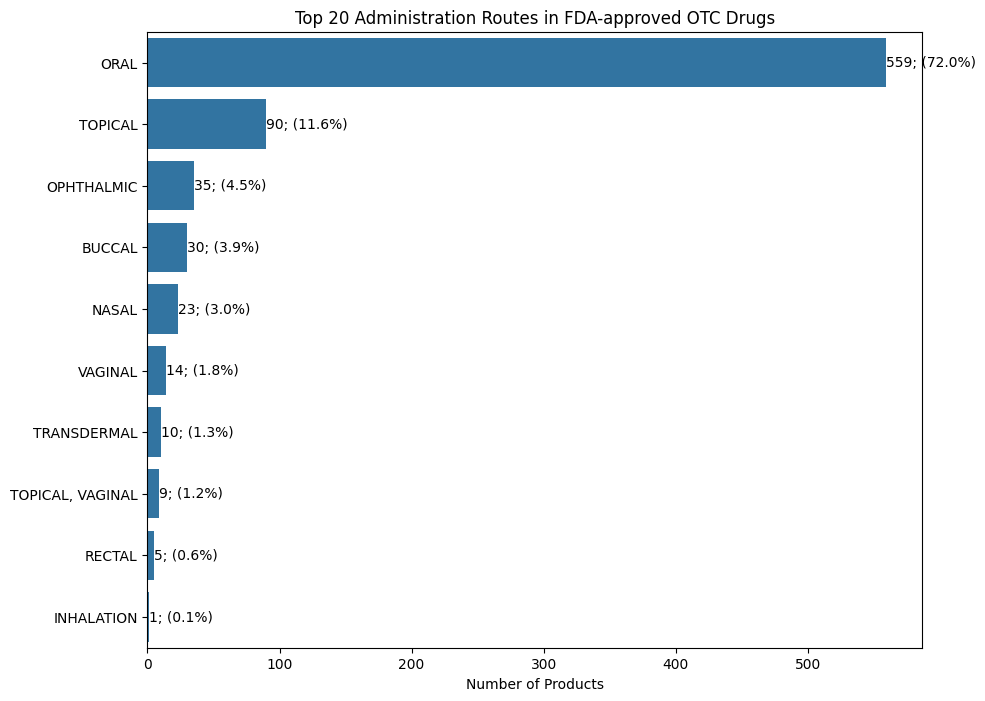

In [74]:
filtered_data = df_prod_tr_cat.loc[df_prod_tr_cat['Type']=="OTC",'Route'] #we filter the dataframe to obtain just the routes of FDA-approved Rx drugs.

order = filtered_data.value_counts().nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.

fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=pd.DataFrame(filtered_data),y='Route', ax=ax, order=order)

df = filtered_data.value_counts().reset_index()  #we create a df to calculate percentages.
df['Percentage']=round((df['count']/df['count'].sum())*100,1) #percentage calculation for each count.

df = df.nlargest(20, columns='count')

display(df)

for container in ax.containers:
  ax.bar_label(container, labels= [f"{c}; ({p}%)" for c, p in zip(df['count'], df['Percentage'])] ) #now we use count and percentages as bar labels. The zip formula is very useful to implement two different itterations in just one for loop.

plt.title('Top 20 Administration Routes in FDA-approved OTC Drugs')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

,Route,count
0,ORAL,2565
1,INJECTION,741
2,INTRAVENOUS,499
3,TOPICAL,220
4,SUBCUTANEOUS,166
5,OPHTHALMIC,128
6,INHALATION,100
7,TRANSDERMAL,87
8,INTRAMUSCULAR,68
9,NASAL,44


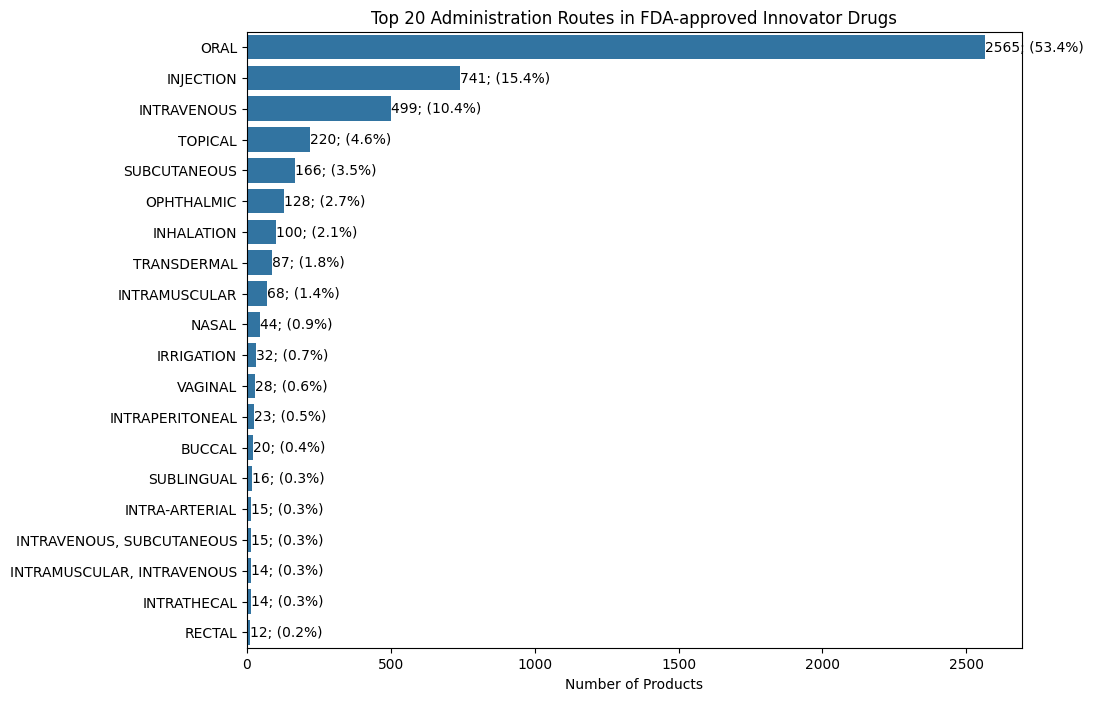

In [62]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Type']!="Discontinued") & (df_prod_tr_cat['Appl_Type']=="Innovator"),'Route'] #we filter the dataframe to obtain just the routes of FDA-approved Innovator drugs.

order = filtered_data.value_counts().nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.

fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=pd.DataFrame(filtered_data),y='Route', ax=ax, order=order)

df = filtered_data.value_counts().nlargest(20).reset_index()  #we create a df to calculate percentages.

display(df)

df['Percentage']=round((df['count']/df['count'].sum())*100,1) #percentage calculation for each count.

for container in ax.containers:
  ax.bar_label(container, labels= [f"{c}; ({p}%)" for c, p in zip(df['count'], df['Percentage'])] ) #now we use count and percentages as bar labels. The zip formula is very useful to implement two different itterations in just one for loop.

plt.title('Top 20 Administration Routes in FDA-approved Innovator Drugs')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

,Route,count,Percentage
0,ORAL,14375,73.9
1,INJECTION,2292,11.8
2,INTRAVENOUS,786,4.0
3,TOPICAL,757,3.9
4,OPHTHALMIC,292,1.5
5,TRANSDERMAL,190,1.0
6,INHALATION,128,0.7
7,SUBCUTANEOUS,126,0.6
8,SUBLINGUAL,71,0.4
9,NASAL,69,0.4


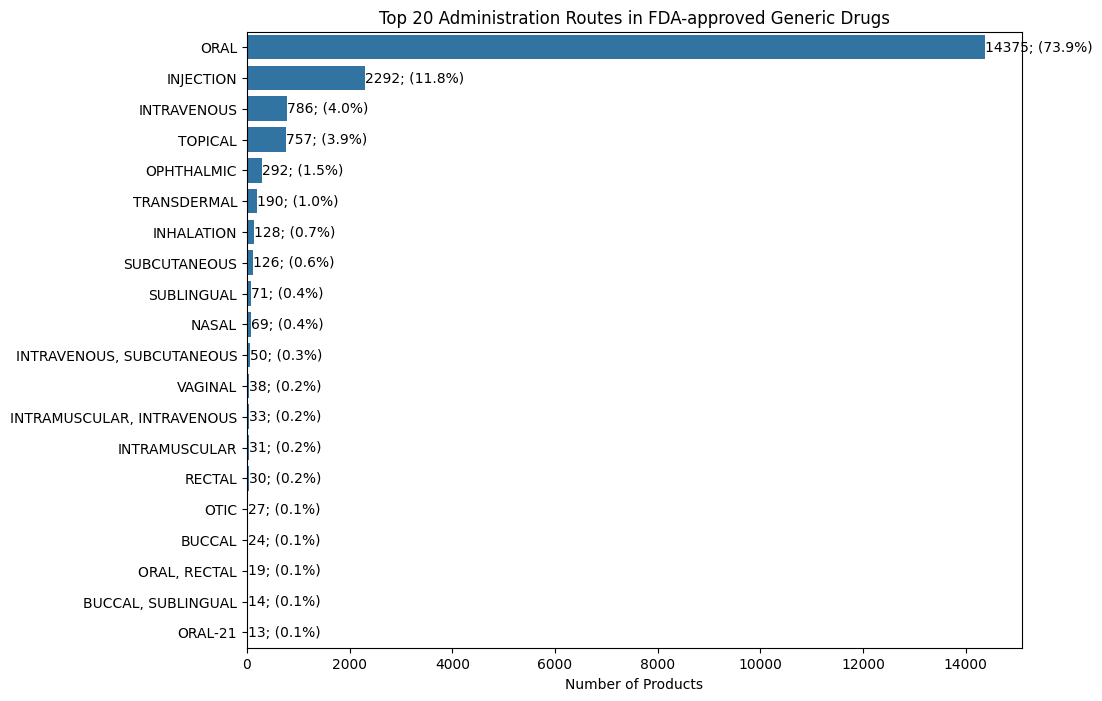

In [75]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Type']!="Discontinued") & (df_prod_tr_cat['Appl_Type']=="Generic"),'Route'] #we filter the dataframe to obtain just the routes of FDA-approved Innovator drugs.

order = filtered_data.value_counts().nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.

fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=pd.DataFrame(filtered_data),y='Route', ax=ax, order=order)

df = filtered_data.value_counts().reset_index()  #we create a df to calculate percentages.
df['Percentage']=round((df['count']/df['count'].sum())*100,1) #percentage calculation for each count.

df = df.nlargest(20, columns='count')

display(df)

for container in ax.containers:
  ax.bar_label(container, labels= [f"{c}; ({p}%)" for c, p in zip(df['count'], df['Percentage'])] ) #now we use count and percentages as bar labels. The zip formula is very useful to implement two different itterations in just one for loop.

plt.title('Top 20 Administration Routes in FDA-approved Generic Drugs')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

5. Which are the firms owning the highest number of FDA-approved products (innovators/generics/Rx/OTC/)? And by Dosage Form? And by Route of administration?

,Applicant,count,Percentage
0,BAXTER HLTHCARE,188,3.8
1,PFIZER,158,3.2
2,B BRAUN,124,2.5
3,ABBVIE,116,2.4
4,HOSPIRA,110,2.2
5,NOVARTIS,108,2.2
6,FRESENIUS KABI USA,108,2.2
7,BAUSCH,91,1.8
8,TAKEDA PHARMS USA,84,1.7
9,HIKMA,72,1.5


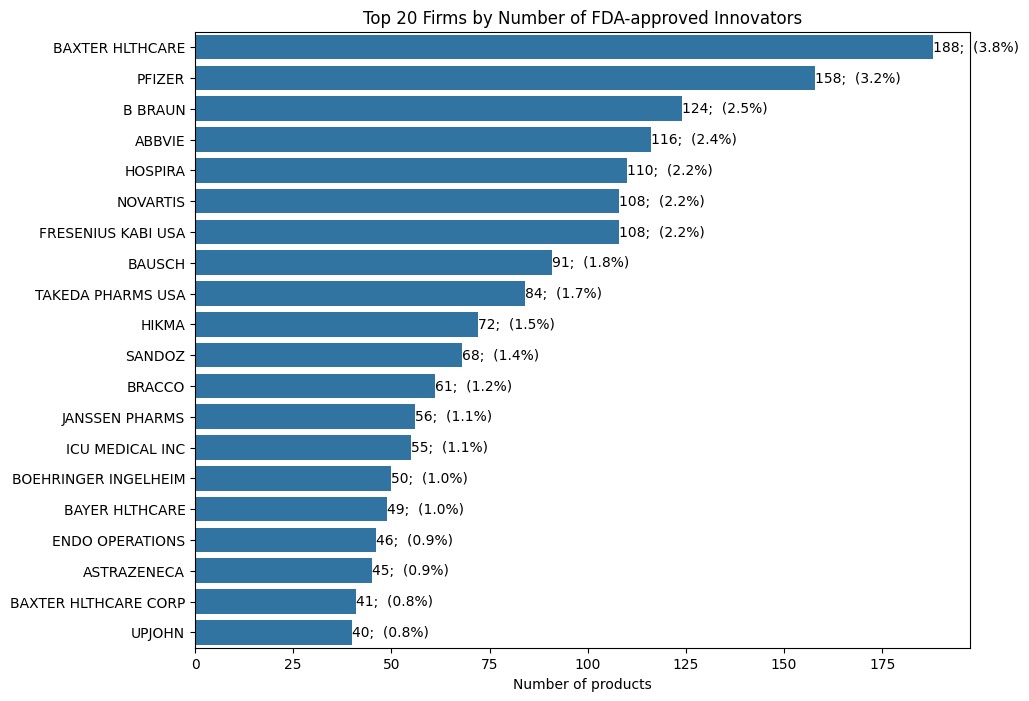

In [80]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Appl_Type']=="Innovator") & (df_prod_tr_cat['Type']!="Discontinued"), 'Applicant']

order = filtered_data.value_counts().nlargest(20).index

fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=pd.DataFrame(filtered_data), y='Applicant', ax=ax, order=order)

df = filtered_data.value_counts().reset_index()  #we create a df to calculate percentages.
df['Percentage']=round((df['count']/df['count'].sum())*100,1) #percentage calculation for each count.

df = df.nlargest(20, columns='count')

display(df)

for container in ax.containers:
  ax.bar_label(container, labels = (f"{c};  ({p}%)" for c,p in zip(df['count'], df['Percentage'])))

plt.xlabel("Number of products")
plt.ylabel(None)
plt.title("Top 20 Firms by Number of FDA-approved Innovators")
plt.show()

,Applicant,count,Percentage
0,HIKMA,429,2.2
1,AUROBINDO PHARMA,428,2.2
2,AUROBINDO PHARMA LTD,408,2.1
3,ZYDUS PHARMS,400,2.1
4,ALEMBIC,349,1.8
5,CHARTWELL RX,343,1.8
6,SANDOZ,322,1.7
7,ALKEM LABS LTD,306,1.6
8,MYLAN,297,1.5
9,FRESENIUS KABI USA,296,1.5


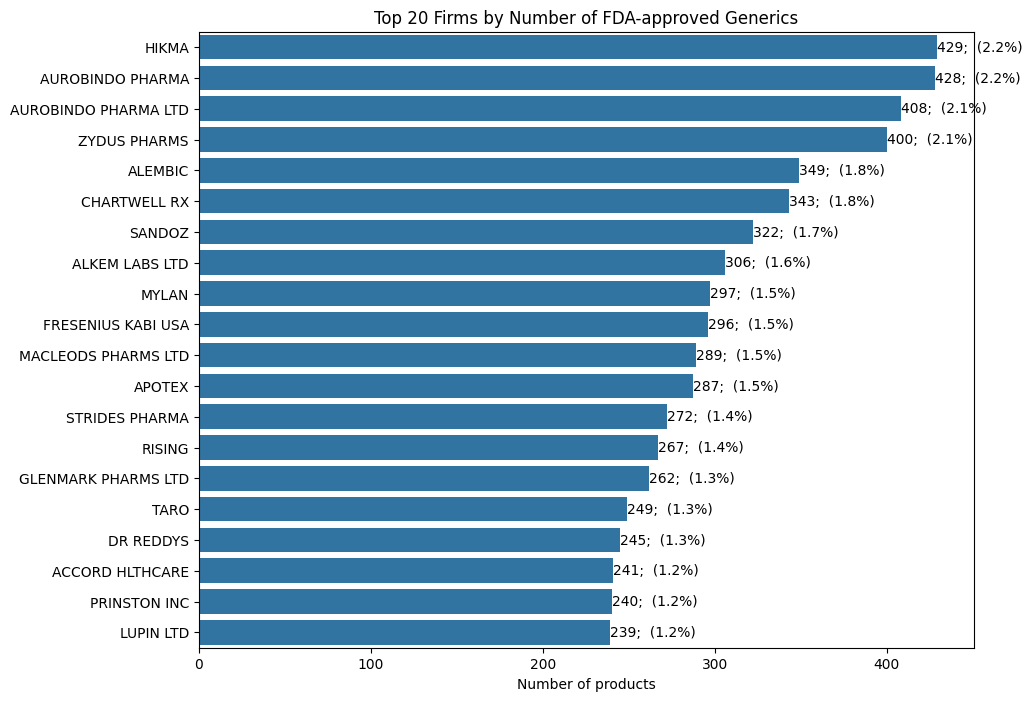

In [83]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Appl_Type']=="Generic") & (df_prod_tr_cat['Type']!="Discontinued"), 'Applicant']

order = filtered_data.value_counts().nlargest(20).index

fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=pd.DataFrame(filtered_data), y='Applicant', ax=ax, order=order)

df = filtered_data.value_counts().reset_index()  #we create a df to calculate percentages.
df['Percentage']=round((df['count']/df['count'].sum())*100,1) #percentage calculation for each count.

df = df.nlargest(20, columns='count')

display(df)

for container in ax.containers:
  ax.bar_label(container, labels = (f"{c};  ({p}%)" for c,p in zip(df['count'], df['Percentage'])))

plt.xlabel("Number of products")
plt.ylabel(None)
plt.title("Top 20 Firms by Number of FDA-approved Generics")
plt.show()

In [84]:
#We can see that the firm Aurobindo is repeated. We will substitute Aurobindo Pharma LTD by Aurobindo Pharma to have just one category for this firm:

df_prod_tr_cat['Applicant']= df_prod_tr_cat['Applicant'].str.replace("AUROBINDO PHARMA LTD", "AUROBINDO PHARMA")

,Applicant,count,Percentage
0,AUROBINDO PHARMA,836,4.3
1,HIKMA,429,2.2
2,ZYDUS PHARMS,400,2.1
3,ALEMBIC,349,1.8
4,CHARTWELL RX,343,1.8
5,SANDOZ,322,1.7
6,ALKEM LABS LTD,306,1.6
7,MYLAN,297,1.5
8,FRESENIUS KABI USA,296,1.5
9,MACLEODS PHARMS LTD,289,1.5


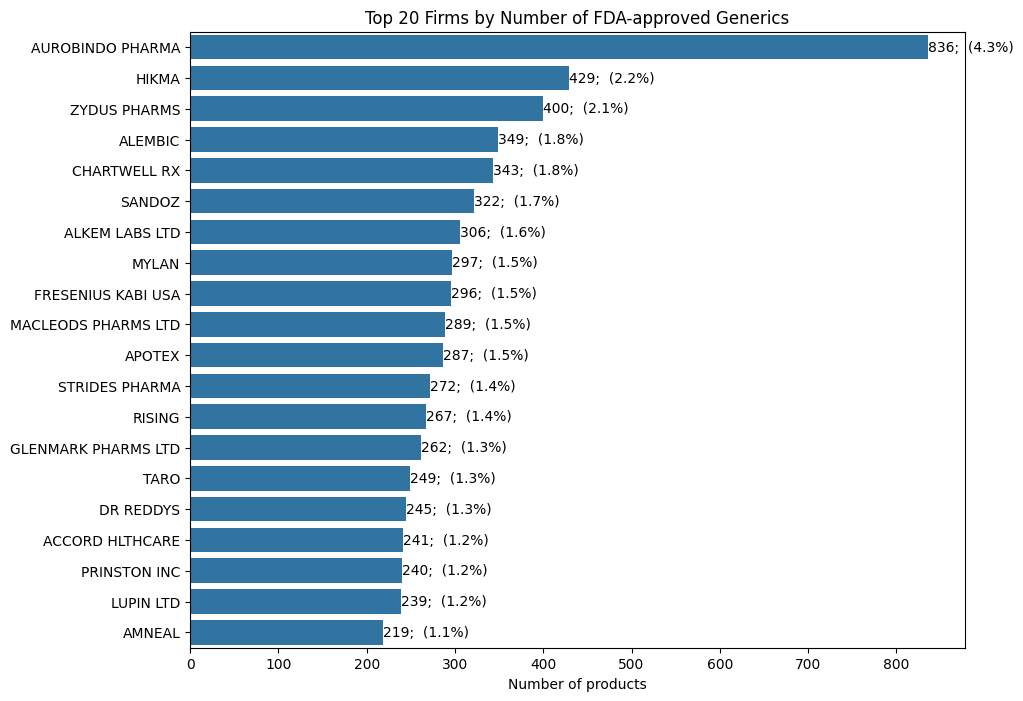

In [85]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Appl_Type']=="Generic") & (df_prod_tr_cat['Type']!="Discontinued"), 'Applicant']

order = filtered_data.value_counts().nlargest(20).index

fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=pd.DataFrame(filtered_data), y='Applicant', ax=ax, order=order)

df = filtered_data.value_counts().reset_index()  #we create a df to calculate percentages.
df['Percentage']=round((df['count']/df['count'].sum())*100,1) #percentage calculation for each count.

df = df.nlargest(20, columns='count')

display(df)

for container in ax.containers:
  ax.bar_label(container, labels = (f"{c};  ({p}%)" for c,p in zip(df['count'], df['Percentage'])))

plt.xlabel("Number of products")
plt.ylabel(None)
plt.title("Top 20 Firms by Number of FDA-approved Generics")
plt.show()

,Applicant_Full_Name,count,Percentage
0,AUROBINDO PHARMA LTD,799,3.4
1,ZYDUS PHARMACEUTICALS USA INC,556,2.4
2,HIKMA PHARMACEUTICALS USA INC,446,1.9
3,SANDOZ INC,417,1.8
4,FRESENIUS KABI USA LLC,404,1.7
5,ALEMBIC PHARMACEUTICALS LTD,388,1.6
6,DR REDDYS LABORATORIES LTD,363,1.5
7,APOTEX INC,356,1.5
8,MYLAN PHARMACEUTICALS INC,352,1.5
9,CHARTWELL RX SCIENCES LLC,349,1.5


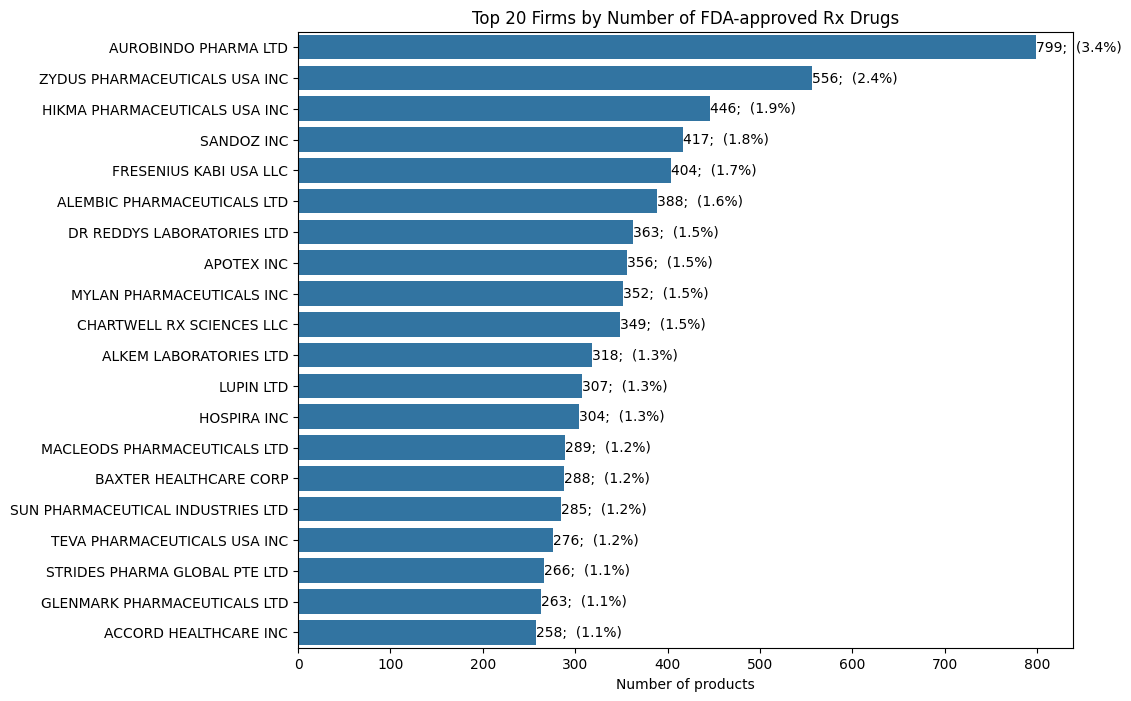

In [86]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Type']=="Prescription"), 'Applicant_Full_Name']

order = filtered_data.value_counts().nlargest(20).index

fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=pd.DataFrame(filtered_data), y='Applicant_Full_Name', ax=ax, order=order)

df = filtered_data.value_counts().reset_index()  #we create a df to calculate percentages.
df['Percentage']=round((df['count']/df['count'].sum())*100,1) #percentage calculation for each count.

df = df.nlargest(20, columns='count')

display(df)

for container in ax.containers:
  ax.bar_label(container, labels = (f"{c};  ({p}%)" for c,p in zip(df['count'], df['Percentage'])))

plt.xlabel("Number of products")
plt.ylabel(None)
plt.title("Top 20 Firms by Number of FDA-approved Rx Drugs")
plt.show()

,Applicant_Full_Name,count,Percentage
0,AUROBINDO PHARMA LTD,56,7.2
1,P AND L DEVELOPMENT LLC,43,5.5
2,PERRIGO R AND D CO,39,5.0
3,HALEON US HOLDINGS LLC,38,4.9
4,DR REDDYS LABORATORIES LTD,34,4.4
5,KENVUE BRANDS LLC,32,4.1
6,L PERRIGO CO,32,4.1
7,TARO PHARMACEUTICAL INDUSTRIES LTD,19,2.4
8,SUN PHARMACEUTICAL INDUSTRIES LTD,18,2.3
9,MARKSANS PHARMA LTD,17,2.2


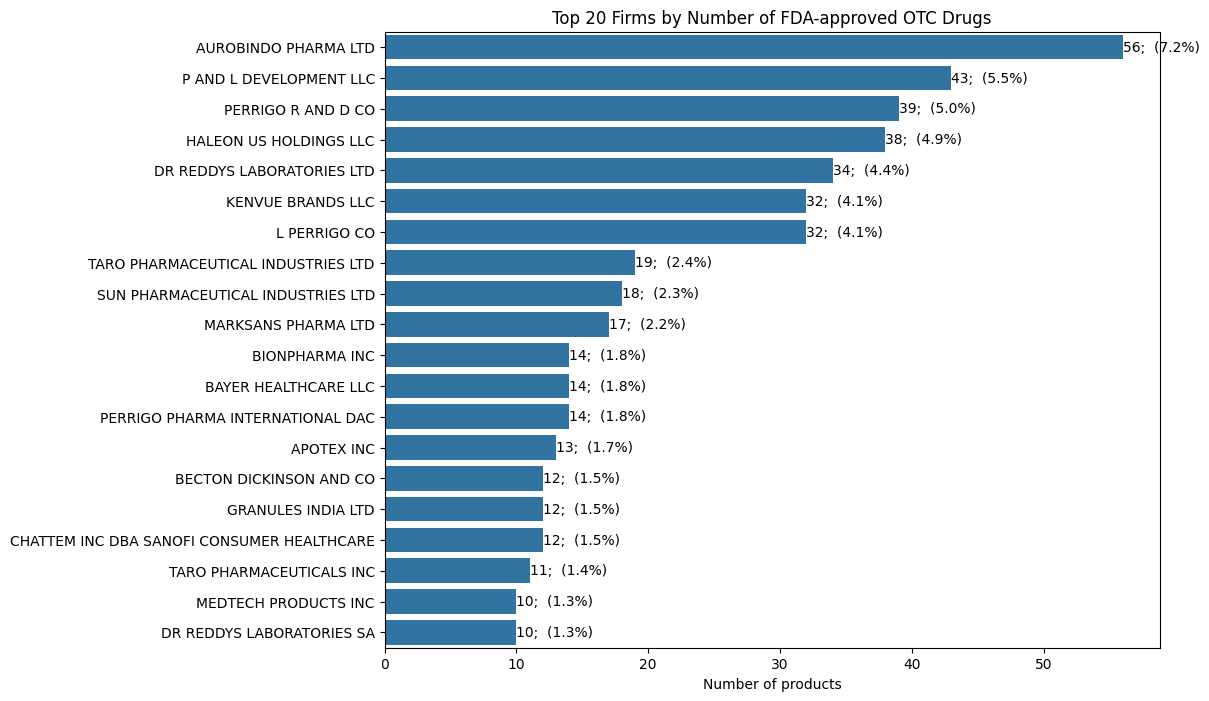

In [87]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Type']=="OTC"), 'Applicant_Full_Name']

order = filtered_data.value_counts().nlargest(20).index

fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=pd.DataFrame(filtered_data), y='Applicant_Full_Name', ax=ax, order=order)

df = filtered_data.value_counts().reset_index()  #we create a df to calculate percentages.
df['Percentage']=round((df['count']/df['count'].sum())*100,1) #percentage calculation for each count.

df = df.nlargest(20, columns='count')

display(df)

for container in ax.containers:
  ax.bar_label(container, labels = (f"{c};  ({p}%)" for c,p in zip(df['count'], df['Percentage'])))

plt.xlabel("Number of products")
plt.ylabel(None)
plt.title("Top 20 Firms by Number of FDA-approved OTC Drugs")
plt.show()

6. What percentage represent innovators and generics with respect to the total number of FDA-approved products? And within prescription drugs? Or within OTC? Which percentage represents Rx and OTC within innovators? And within generics?

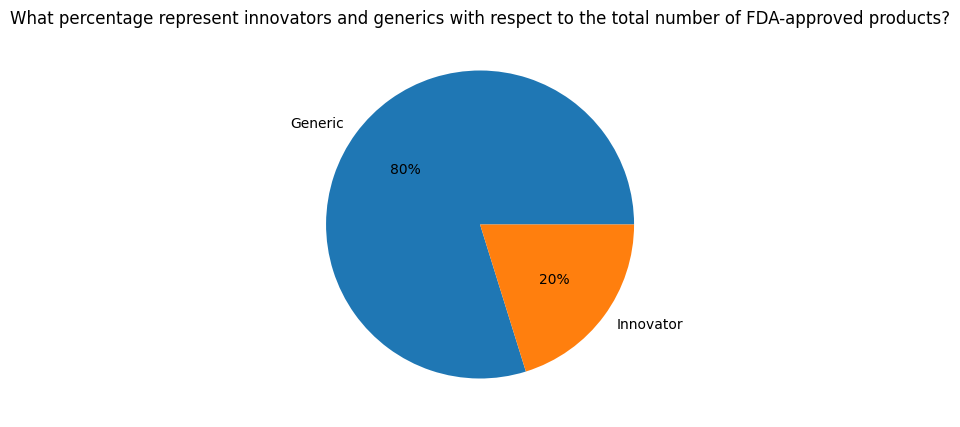

In [ ]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Type']!="Discontinued"), 'Appl_Type']
data = filtered_data.value_counts().reset_index()
labels = filtered_data.value_counts().index

fig, ax = plt.subplots(figsize=(5,5))
plt.pie(x=data['count'], labels=labels, autopct="%1.f%%")
plt.title("What percentage represent innovators and generics with respect to the total number of FDA-approved products?")
plt.show()

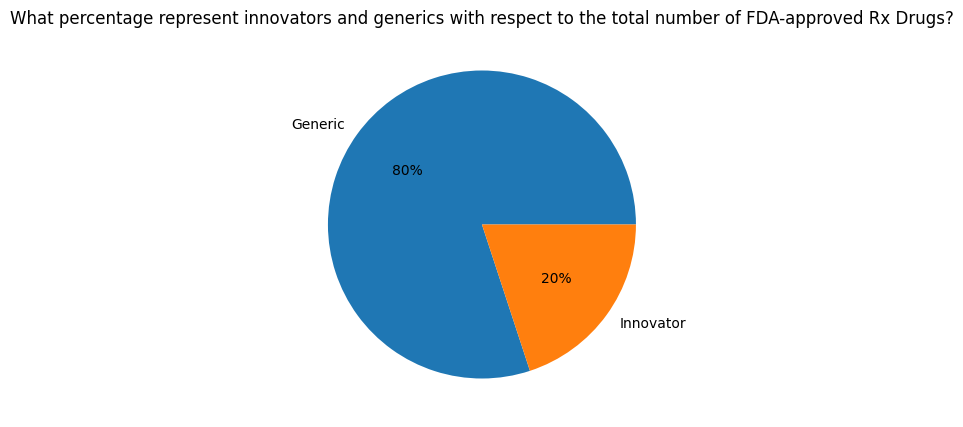

In [ ]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Type']=="Prescription"), 'Appl_Type']
data = filtered_data.value_counts().reset_index()
labels = filtered_data.value_counts().index

fig, ax = plt.subplots(figsize=(5,5))
plt.pie(x=data['count'], labels=labels, autopct="%1.f%%")
plt.title("What percentage represent innovators and generics with respect to the total number of FDA-approved Rx Drugs?")
plt.show()

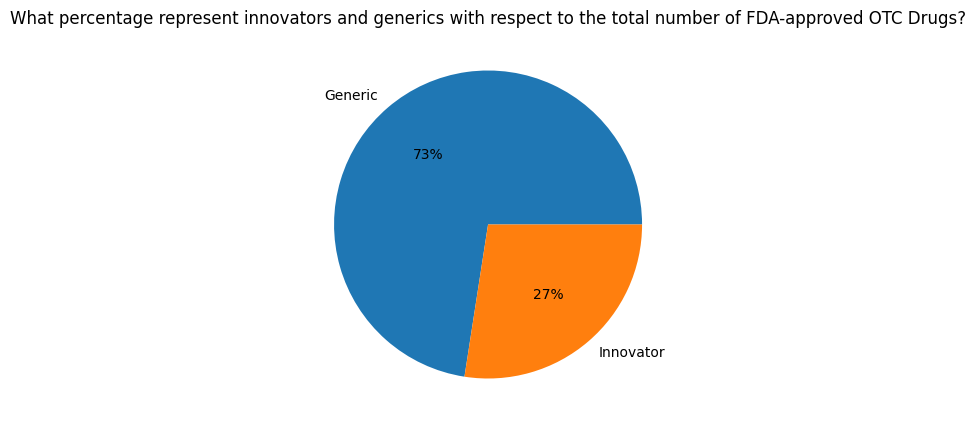

In [ ]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Type']=="OTC"), 'Appl_Type']
data = filtered_data.value_counts().reset_index()
labels = filtered_data.value_counts().index

fig, ax = plt.subplots(figsize=(5,5))
plt.pie(x=data['count'], labels=labels, autopct="%1.f%%")
plt.title("What percentage represent innovators and generics with respect to the total number of FDA-approved OTC Drugs?")
plt.show()

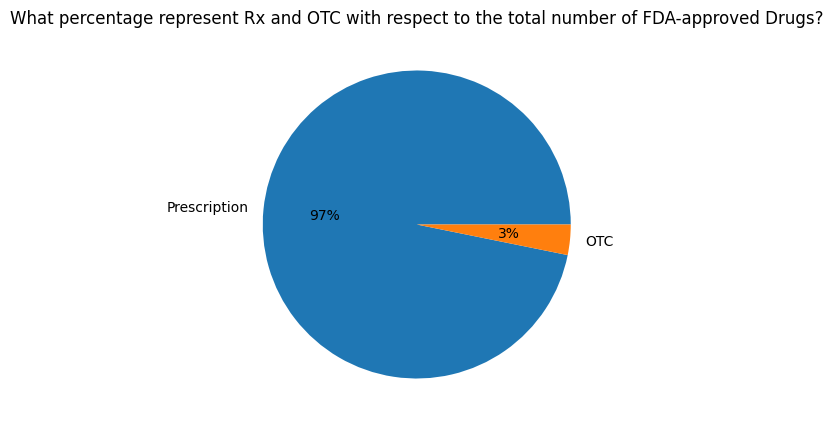

In [ ]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Type']!="Discontinued"), 'Type']
data = filtered_data.value_counts().reset_index()
labels = filtered_data.value_counts().index

fig, ax = plt.subplots(figsize=(5,5))
plt.pie(x=data['count'], labels=labels, autopct="%1.f%%")
plt.title("What percentage represent Rx and OTC with respect to the total number of FDA-approved Drugs?")
plt.show()

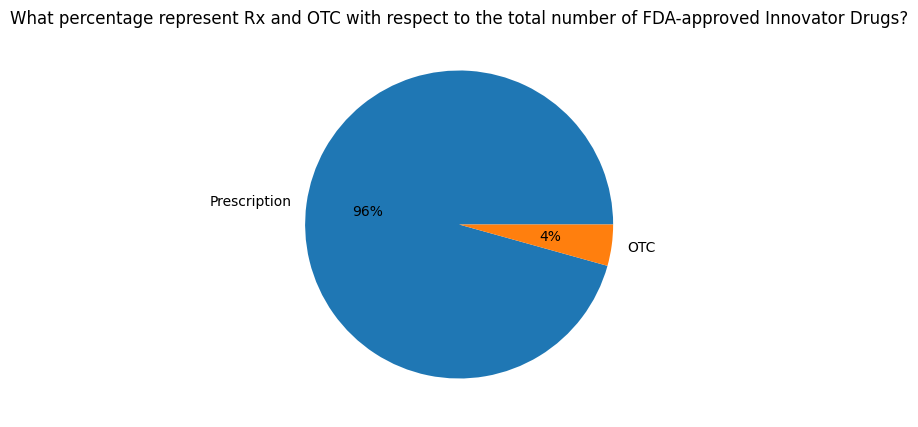

In [ ]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Appl_Type']=="Innovator") & (df_prod_tr_cat['Type']!="Discontinued"), 'Type']
data = filtered_data.value_counts().reset_index()
labels = filtered_data.value_counts().index

fig, ax = plt.subplots(figsize=(5,5))
plt.pie(x=data['count'], labels=labels, autopct="%1.f%%")
plt.title("What percentage represent Rx and OTC with respect to the total number of FDA-approved Innovator Drugs?")
plt.show()

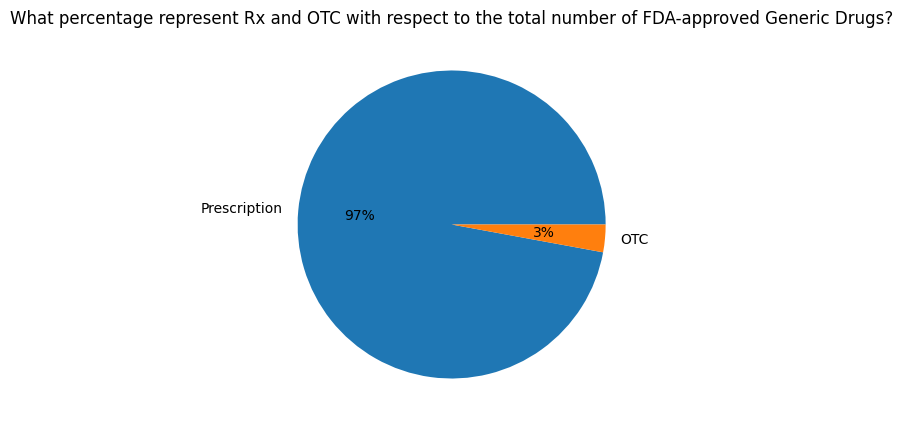

In [ ]:
filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Appl_Type']=="Generic") & (df_prod_tr_cat['Type']!="Discontinued"), 'Type']
data = filtered_data.value_counts().reset_index()
labels = filtered_data.value_counts().index

fig, ax = plt.subplots(figsize=(5,5))
plt.pie(x=data['count'], labels=labels, autopct="%1.f%%")
plt.title("What percentage represent Rx and OTC with respect to the total number of FDA-approved Generic Drugs?")
plt.show()

7. How many different new drug applications (NDA or ANDAs) are registered at the FDA orange book at this moment?

In [ ]:
df_prod_tr['Appl_No'].nunique() #nunique is useful for counting unique values.

26122

8. How many different products (product numbers) are normally included in a new drug application that has been approved by the FDA (mode, mean, median)? Is it different for innovators and generics? Is it different between Rx and OTC?

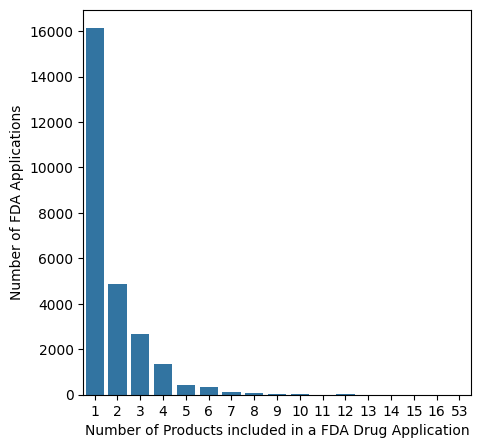

In [89]:
Products_Count_per_Appl = df_prod_tr['Appl_No'].value_counts().reset_index() #Application number value counts is going to be useful to count number of different products (product numbers) included on each drug application (Application number).

fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x=Products_Count_per_Appl['count'], ax=ax)
plt.xlabel("Number of Products included in a FDA Drug Application")
plt.ylabel("Number of FDA Applications")
plt.show()

In [ ]:
print(f"Mean = {round(Products_Count_per_Appl['count'].mean(),1)}")
print(f"Median = {round(Products_Count_per_Appl['count'].median(),1)}")
print(f"Mode = {Products_Count_per_Appl['count'].mode().iloc[0]}")

Mean = 1.8
Median = 1.0
Mode = 1


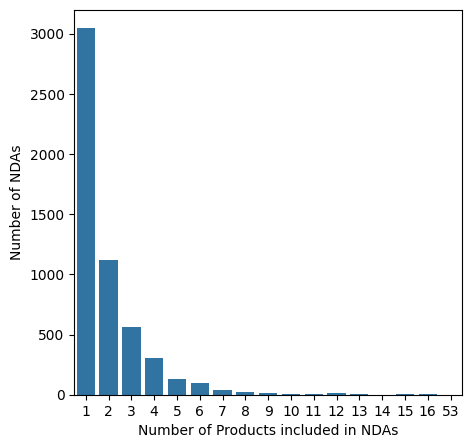

In [ ]:
Products_Count_per_Appl = df_prod_tr.loc[df_prod_tr['Appl_Type']=="Innovator",'Appl_No'].value_counts().reset_index() #Application number value counts is going to be useful to count number of different products (product numbers) included on each drug application (Application number).

fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x=Products_Count_per_Appl['count'], ax=ax)
plt.xlabel("Number of Products included in NDAs")
plt.ylabel("Number of NDAs")
plt.show()

In [ ]:
print(f"Mean = {round(Products_Count_per_Appl['count'].mean(),1)}")
print(f"Median = {round(Products_Count_per_Appl['count'].median(),1)}")
print(f"Mode = {Products_Count_per_Appl['count'].mode().iloc[0]}")

Mean = 2.0
Median = 1.0
Mode = 1


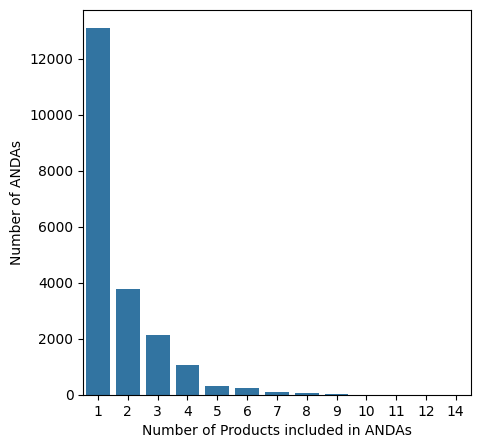

In [ ]:
Products_Count_per_Appl = df_prod_tr.loc[df_prod_tr['Appl_Type']=="Generic",'Appl_No'].value_counts().reset_index() #Application number value counts is going to be useful to count number of different products (product numbers) included on each drug application (Application number).

fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x=Products_Count_per_Appl['count'], ax=ax)
plt.xlabel("Number of Products included in ANDAs")
plt.ylabel("Number of ANDAs")
plt.show()

In [ ]:
print(f"Mean = {round(Products_Count_per_Appl['count'].mean(),1)}")
print(f"Median = {round(Products_Count_per_Appl['count'].median(),1)}")
print(f"Mode = {Products_Count_per_Appl['count'].mode().iloc[0]}")

Mean = 1.7
Median = 1.0
Mode = 1


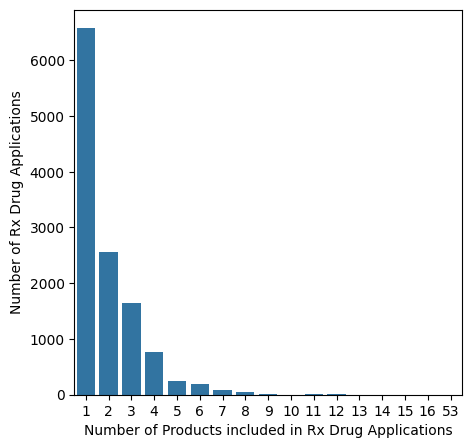

In [ ]:
Products_Count_per_Appl = df_prod_tr.loc[df_prod_tr['Type']=="Prescription",'Appl_No'].value_counts().reset_index() #Application number value counts is going to be useful to count number of different products (product numbers) included on each drug application (Application number).

fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x=Products_Count_per_Appl['count'], ax=ax)
plt.xlabel("Number of Products included in Rx Drug Applications")
plt.ylabel("Number of Rx Drug Applications")
plt.show()

In [ ]:
print(f"Mean = {round(Products_Count_per_Appl['count'].mean(),1)}")
print(f"Median = {round(Products_Count_per_Appl['count'].median(),1)}")
print(f"Mode = {Products_Count_per_Appl['count'].mode().iloc[0]}")

Mean = 1.9
Median = 1.0
Mode = 1


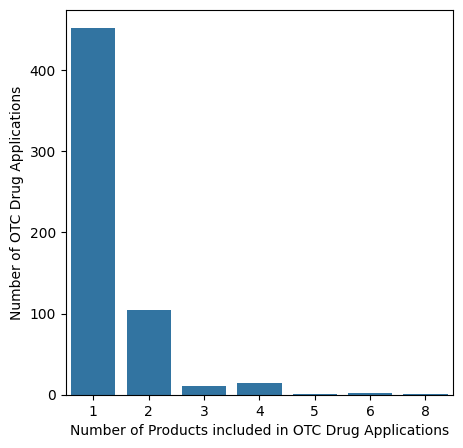

In [92]:
Products_Count_per_Appl = df_prod_tr.loc[df_prod_tr['Type']=="OTC",'Appl_No'].value_counts().reset_index() #Application number value counts is going to be useful to count number of different products (product numbers) included on each drug application (Application number).

fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x=Products_Count_per_Appl['count'], ax=ax)
plt.xlabel("Number of Products included in OTC Drug Applications")
plt.ylabel("Number of OTC Drug Applications")
plt.show()

In [93]:
print(f"Mean = {round(Products_Count_per_Appl['count'].mean(),1)}")
print(f"Median = {round(Products_Count_per_Appl['count'].median(),1)}")
print(f"Mode = {Products_Count_per_Appl['count'].mode().iloc[0]}")

Mean = 1.3
Median = 1.0
Mode = 1


,Ingredient,Combination_Drug,Dosage_Form,Route,Trade_Name,Applicant,Appl_Type,Reference_Listed_Drug,Reference_Standard,Therapeutically_Equivalent,Type,Applicant_Full_Name
0,BUDESONIDE,No,"AEROSOL, FOAM",RECTAL,BUDESONIDE,PADAGIS ISRAEL,Generic,No,Yes,Yes,Prescription,PADAGIS ISRAEL PHARMACEUTICALS LTD
1,BUDESONIDE,No,"AEROSOL, FOAM",RECTAL,UCERIS,SALIX,Innovator,Yes,No,Yes,Prescription,SALIX PHARMACEUTICALS INC
2,MINOCYCLINE HYDROCHLORIDE,No,"AEROSOL, FOAM",TOPICAL,AMZEEQ,JOURNEY,Innovator,Yes,Yes,Not Rated,Prescription,JOURNEY MEDICAL CORP
4,BETAMETHASONE VALERATE,No,"AEROSOL, FOAM",TOPICAL,BETAMETHASONE VALERATE,ALEMBIC,Generic,No,No,Yes,Prescription,ALEMBIC PHARMACEUTICALS LTD
6,BETAMETHASONE VALERATE,No,"AEROSOL, FOAM",TOPICAL,BETAMETHASONE VALERATE,PADAGIS ISRAEL,Generic,No,No,Yes,Prescription,PADAGIS ISRAEL PHARMACEUTICALS LTD


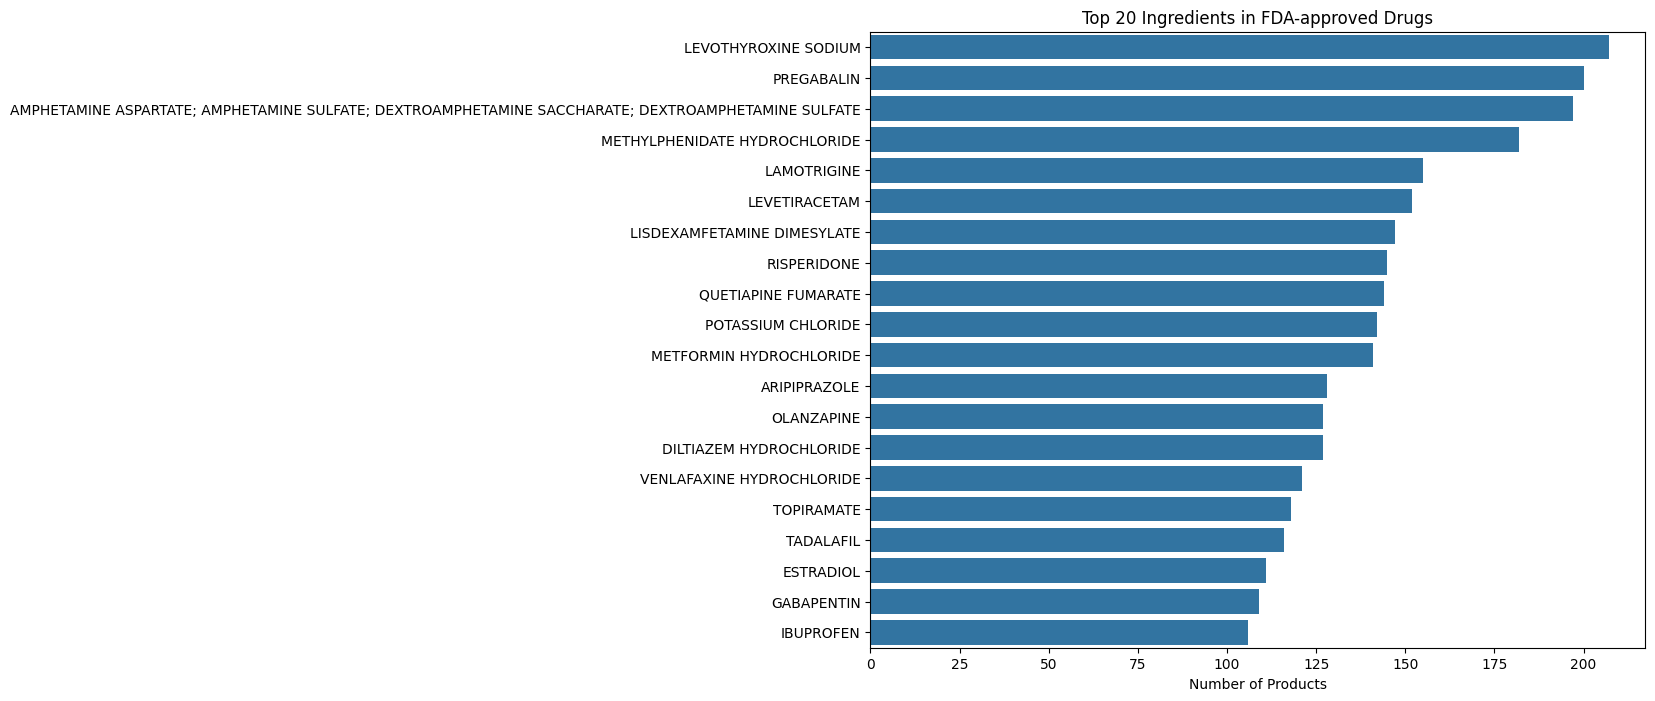

In [ ]:
#Univariate analysis of Ingredient

filtered_data = df_prod_tr_cat.loc[(df_prod_tr_cat['Type']!="Discontinued")]

display(filtered_data.head())

order = filtered_data['Ingredient'].value_counts().nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.

fig, ax = plt.subplots(figsize=(10,8)) #it is a good practice to first create a figure with the correct size.
sns.countplot(data=filtered_data,y='Ingredient', ax=ax, order=order) #here we apply the order we have previously defined.

plt.title('Top 20 Ingredients in FDA-approved Drugs')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

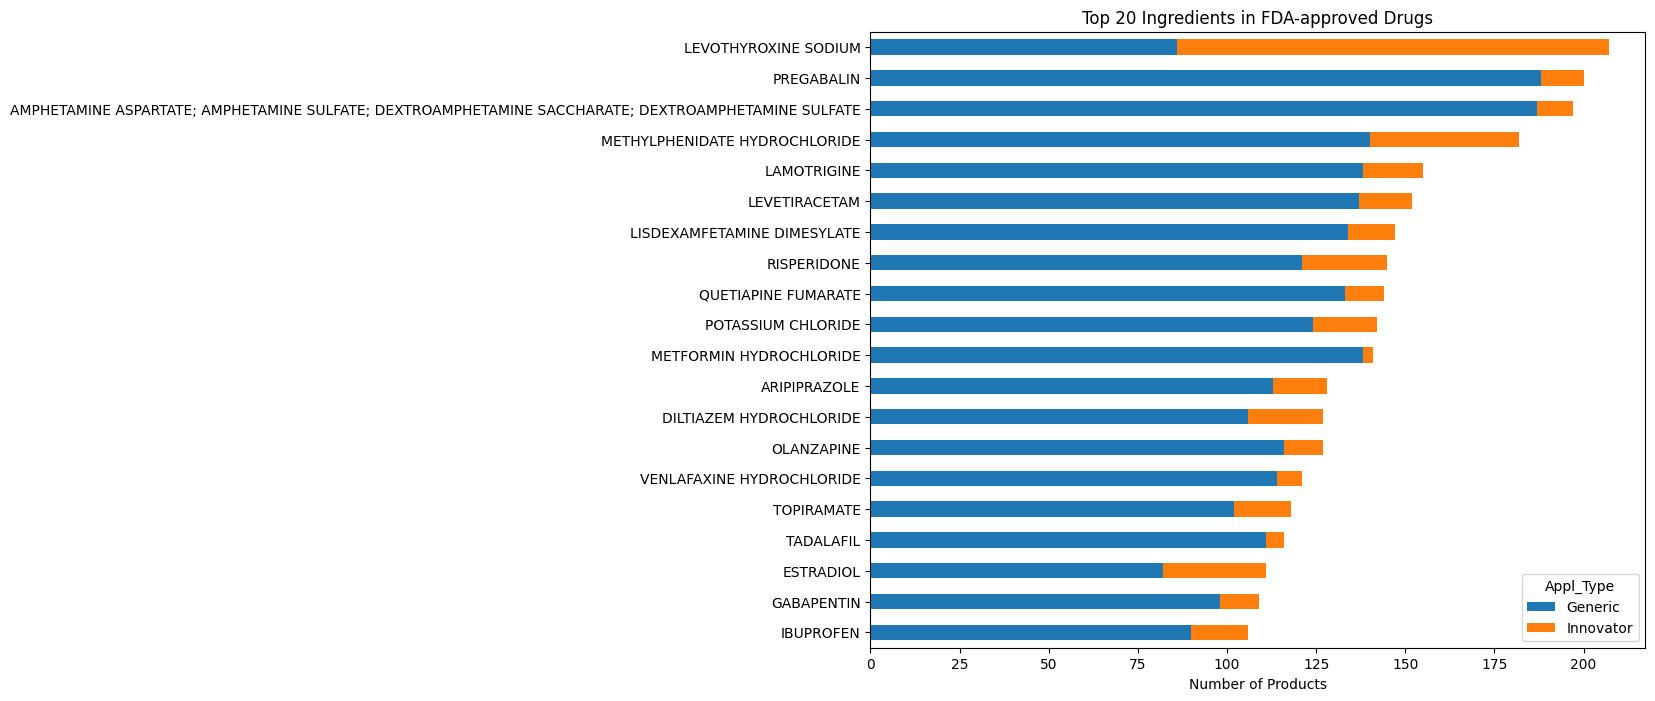

In [ ]:
# Filter data
filtered_data = df_prod_tr_cat.loc[df_prod_tr_cat['Type'] != "Discontinued"]

# Compute counts of 'Innovator' and 'Generic' per ingredient
stacked_data = pd.crosstab(filtered_data['Ingredient'], filtered_data['Appl_Type']) #it counts innovators and generics per ingredient.
# display (stacked_data.head())
stacked_data = stacked_data.loc[stacked_data.sum(axis=1).nlargest(20).sort_values(ascending=True).index]

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
stacked_data.plot(kind='barh', stacked=True, ax=ax)

plt.title('Top 20 Ingredients in FDA-approved Drugs')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.legend(title='Appl_Type')
plt.show()